In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2pvaG5jaGVuL0RvY3VtZW50cy9Tb2x1dGlvbnMvY291cnNlLXdlYnNpdGUvc2xpZGVzLzAz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1755169931.0, "/opt/homebrew/Cellar/python@3.13/3.13.7/Frameworks/Python.

In [2]:
#| label: setup

# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skewnorm
from scipy.stats import kurtosis, norm
from scipy.stats import gamma
import missingno as msno
import random
import statsmodels.api as sm

# Increase font size of all Seaborn plot elements
sns.set(font_scale = 1.25)

# Load in UK Smoking Data
births14 = pd.read_csv("data/births14.csv")

# Set seed
random.seed(123)

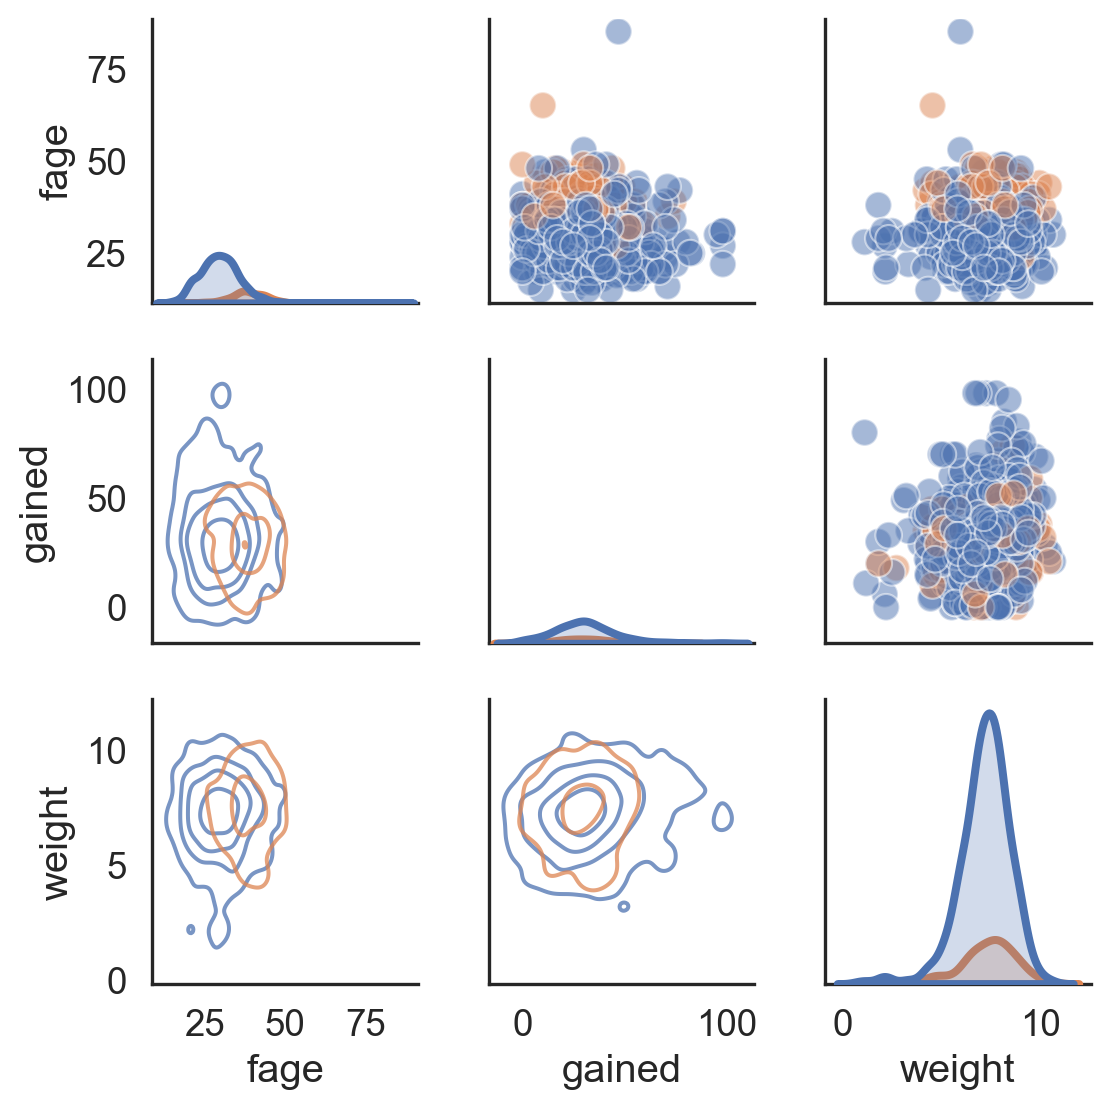

In [3]:
#| echo: false
#| fig-align: "center"
dataplot = births14[["fage", "gained", "weight", "mature"]]

sns.set_style("white")

g = sns.PairGrid(dataplot, hue = "mature", height = 2)
g1 = g.map_upper(sns.scatterplot, alpha = 0.5, s = 100)
g2 = g1.map_diag(sns.kdeplot, fill = True, linewidth = 3)
g3 = g2.map_lower(sns.kdeplot, levels = 5, alpha = 0.75)

plt.show()

In [4]:
births14.head()

fage  mage       mature  weeks     premie  visits  gained  weight  \
0  34.0    34  younger mom     37  full term    14.0    28.0    6.96   
1  36.0    31  younger mom     41  full term    12.0    41.0    8.86   
2  37.0    36   mature mom     37  full term    10.0    28.0    7.51   
3   NaN    16  younger mom     38  full term     NaN    29.0    6.19   
4  32.0    31  younger mom     36     premie    12.0    48.0    6.75   

  lowbirthweight     sex      habit      marital   whitemom  
0        not low    male  nonsmoker      married      white  
1        not low  female  nonsmoker      married      white  
2        not low  female  nonsmoker      married  not white  
3        not low    male  nonsmoker  not married      white  
4        not low  female  nonsmoker      married      white

In [5]:
births14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            886 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           1000 non-null   int64  
 4   premie          1000 non-null   object 
 5   visits          944 non-null    float64
 6   gained          958 non-null    float64
 7   weight          1000 non-null   float64
 8   lowbirthweight  1000 non-null   object 
 9   sex             1000 non-null   object 
 10  habit           981 non-null    object 
 11  marital         1000 non-null   object 
 12  whitemom        1000 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 101.7+ KB


In [6]:
births14.describe()

fage         mage        weeks      visits      gained  \
count  886.000000  1000.000000  1000.000000  944.000000  958.000000   
mean    31.133183    28.449000    38.666000   11.351695   30.425887   
std      7.058135     5.759737     2.564961    4.108192   15.242527   
min     15.000000    14.000000    21.000000    0.000000    0.000000   
25%     26.000000    24.000000    38.000000    9.000000   20.000000   
50%     31.000000    28.000000    39.000000   12.000000   30.000000   
75%     35.000000    33.000000    40.000000   14.000000   38.000000   
max     85.000000    47.000000    46.000000   30.000000   98.000000   

            weight  
count  1000.000000  
mean      7.198160  
std       1.306775  
min       0.750000  
25%       6.545000  
50%       7.310000  
75%       8.000000  
max      10.620000

In [7]:
# Example with the premie column
groups = births14.groupby('premie').describe().unstack(1)

# Print all rows
print(groups.to_string())

               premie   
fage    count  full term    775.000000
               premie       111.000000
        mean   full term     30.967742
               premie        32.288288
        std    full term      6.681591
               premie         9.226826
        min    full term     15.000000
               premie        15.000000
        25%    full term     26.000000
               premie        27.000000
        50%    full term     31.000000
               premie        32.000000
        75%    full term     35.000000
               premie        36.000000
        max    full term     49.000000
               premie        85.000000
mage    count  full term    876.000000
               premie       124.000000
        mean   full term     28.329909
               premie        29.290323
        std    full term      5.721104
               premie         5.982052
        min    full term     14.000000
               premie        16.000000
        25%    full term     24.000000


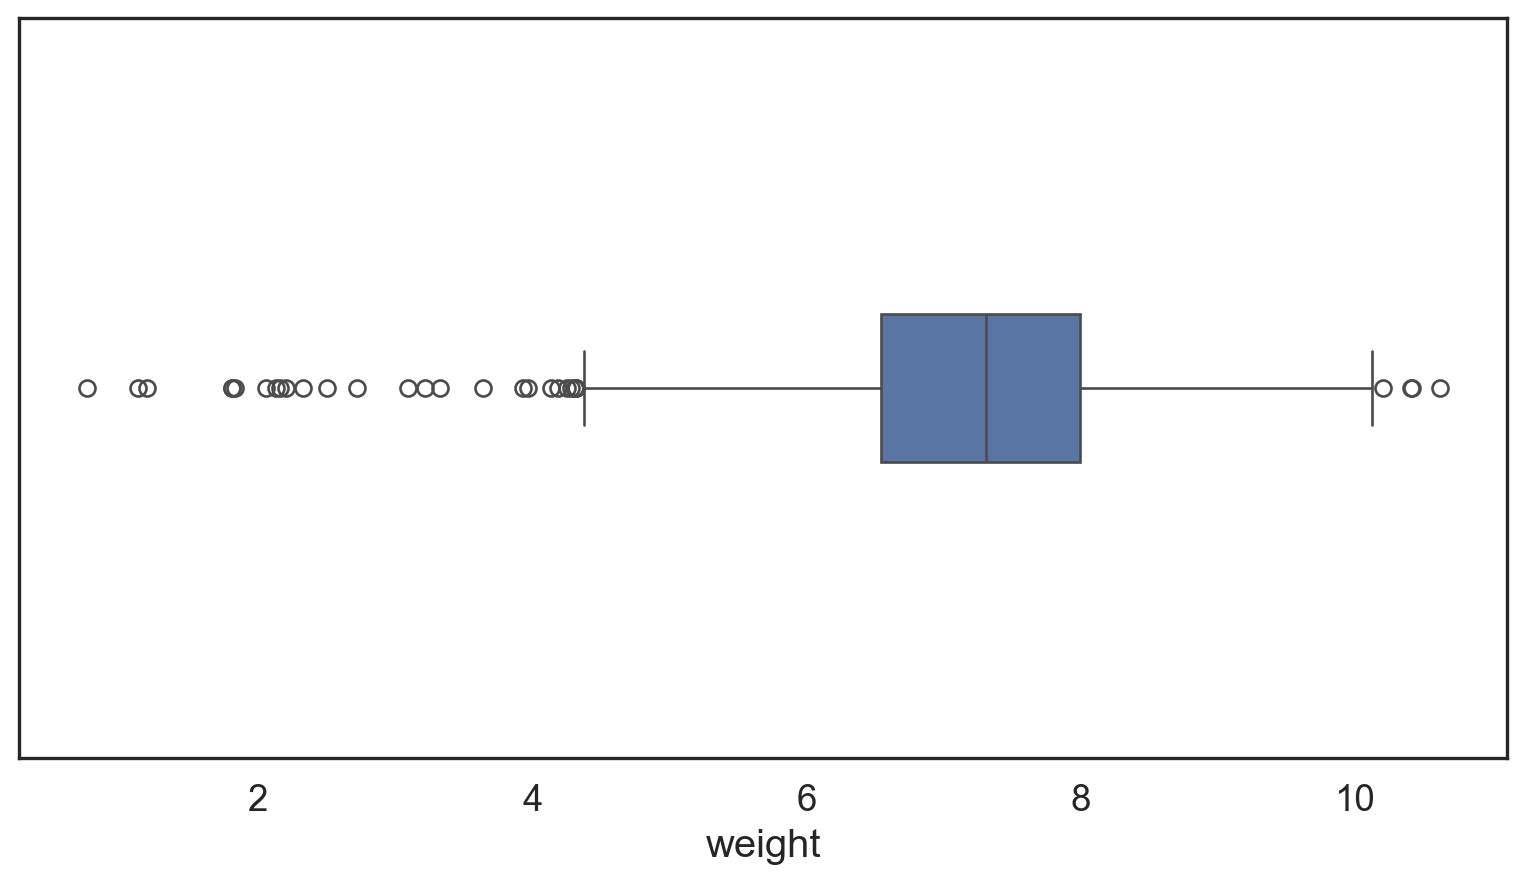

In [8]:
#| fig-align: "center"

# Change theme to "white"
sns.set_style("white")

# Boxplot of all numerical variables
sns.boxplot(data = births14, x = 'weight', width = 0.20)
plt.show()

In [9]:
#| echo: false

# Make a copy of the births14 data 
dataCopy = births14.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)
  
  # Calculate the outlier cutoff 
  cut_off = IQR * 1.5
  
  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  # Print the values
  print(' ')
  
  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25 =', q25, 'q75 =', q75, 'IQR =', IQR)
  
  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

 
fage q25 = 26.0 q75 = 35.0 IQR = 9.0
lower, upper: 12.5 48.5
Number of Outliers:  7
 
mage q25 = 24.0 q75 = 33.0 IQR = 9.0
lower, upper: 10.5 46.5
Number of Outliers:  1
 
weeks q25 = 38.0 q75 = 40.0 IQR = 2.0
lower, upper: 35.0 43.0
Number of Outliers:  72
 
visits q25 = 9.0 q75 = 14.0 IQR = 5.0
lower, upper: 1.5 21.5
Number of Outliers:  30
 
gained q25 = 20.0 q75 = 38.0 IQR = 18.0
lower, upper: -7.0 65.0
Number of Outliers:  26
 
weight q25 = 6.545 q75 = 8.0 IQR = 1.455
lower, upper: 4.362 10.183
Number of Outliers:  32


In [10]:
#| eval: false

# Make a copy of the births14 data 
dataCopy = births14.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)
  
  # Calculate the outlier cutoff 
  cut_off = IQR * 1.5
  
  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  # Print the values
  print(' ')
  
  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25 =', q25, 'q75 =', q75, 'IQR =', IQR)
  
  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

In [11]:
#| code-line-numbers: "1-14|2|4|6,7,8|10,11|13"
# Select numerical columns
numerical_cols = births14.select_dtypes(include = ['number']).columns

for col in numerical_cols:
    # Find Q1, Q3, and interquartile range (IQR) for each column
    Q1 = births14[col].quantile(0.25)
    Q3 = births14[col].quantile(0.75)
    IQR = Q3 - Q1
    # Upper and lower bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers from the DataFrame
    births14_clean = births14[(births14[col] >= lower_bound) & (births14[col] <= upper_bound)]

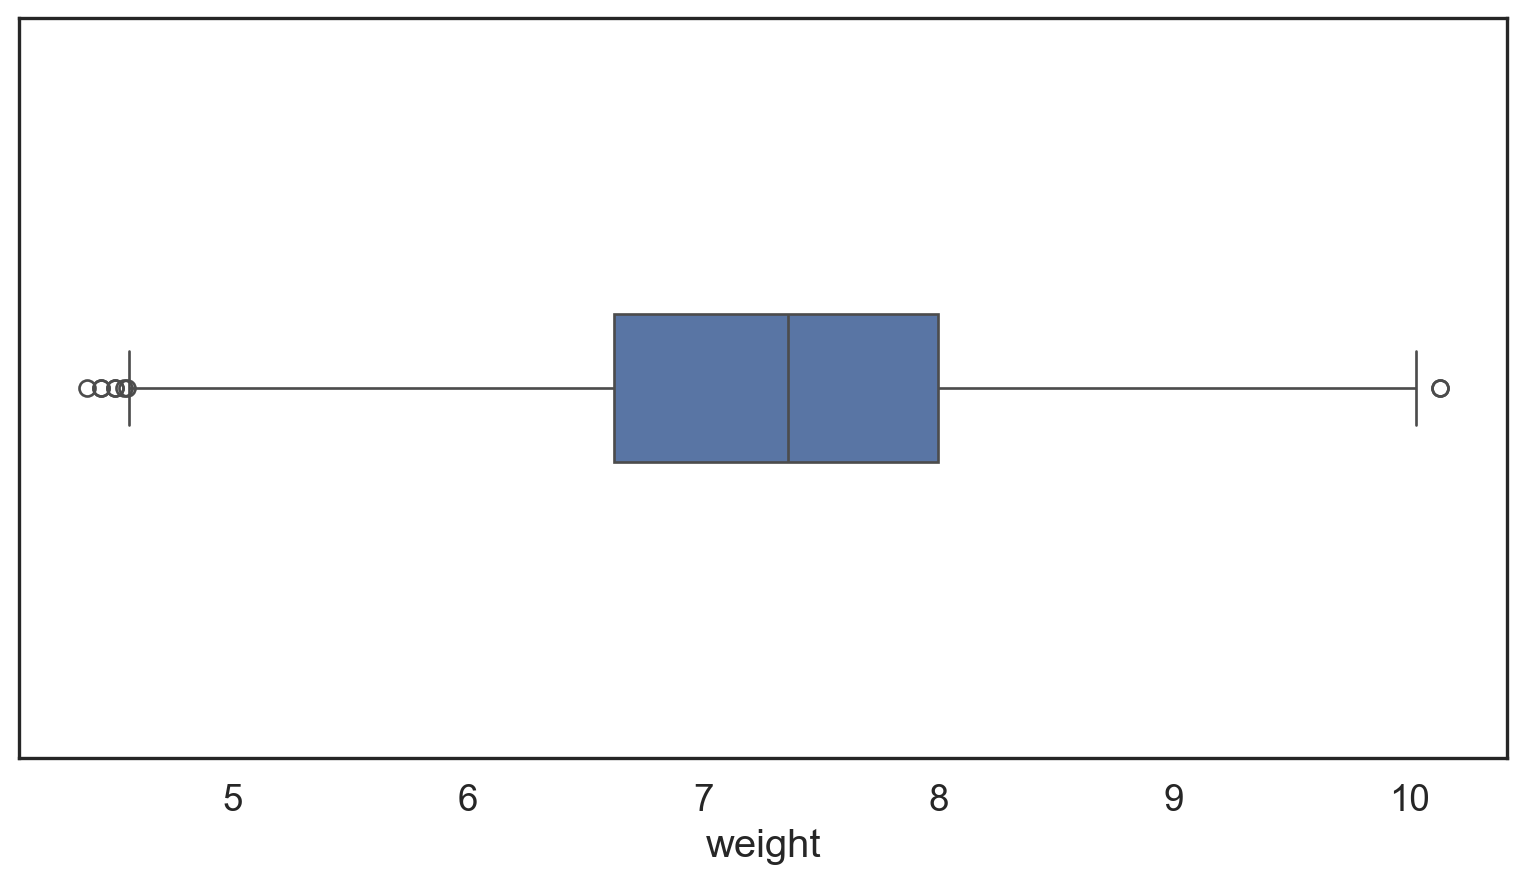

In [12]:
#| echo: false
#| fig-align: "center"

# Change theme to "white"
sns.set_style("white")

# Boxplot of all numerical variables
sns.boxplot(data = births14_clean, x = 'weight', width = 0.20)
plt.show()

In [13]:
# Sum of NAs in each column (should be the same, 10% of all)   
births14.isnull().sum()

fage              114
mage                0
mature              0
weeks               0
premie              0
visits             56
gained             42
weight              0
lowbirthweight      0
sex                 0
habit              19
marital             0
whitemom            0
dtype: int64

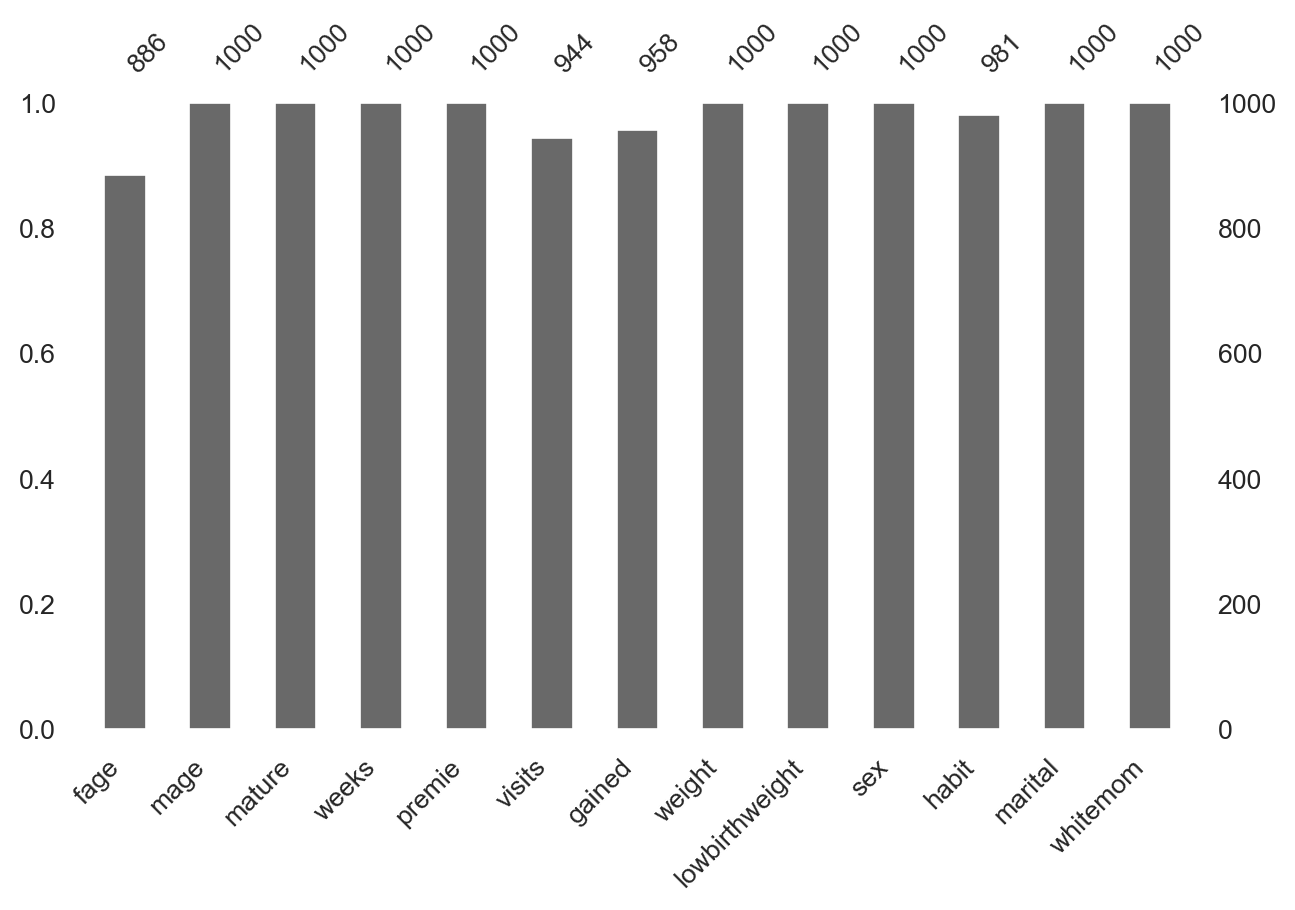

In [14]:
#| fig-align: "center"
msno.bar(births14, figsize = (7, 5), fontsize = 10)
plt.tight_layout()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44738/738560767.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


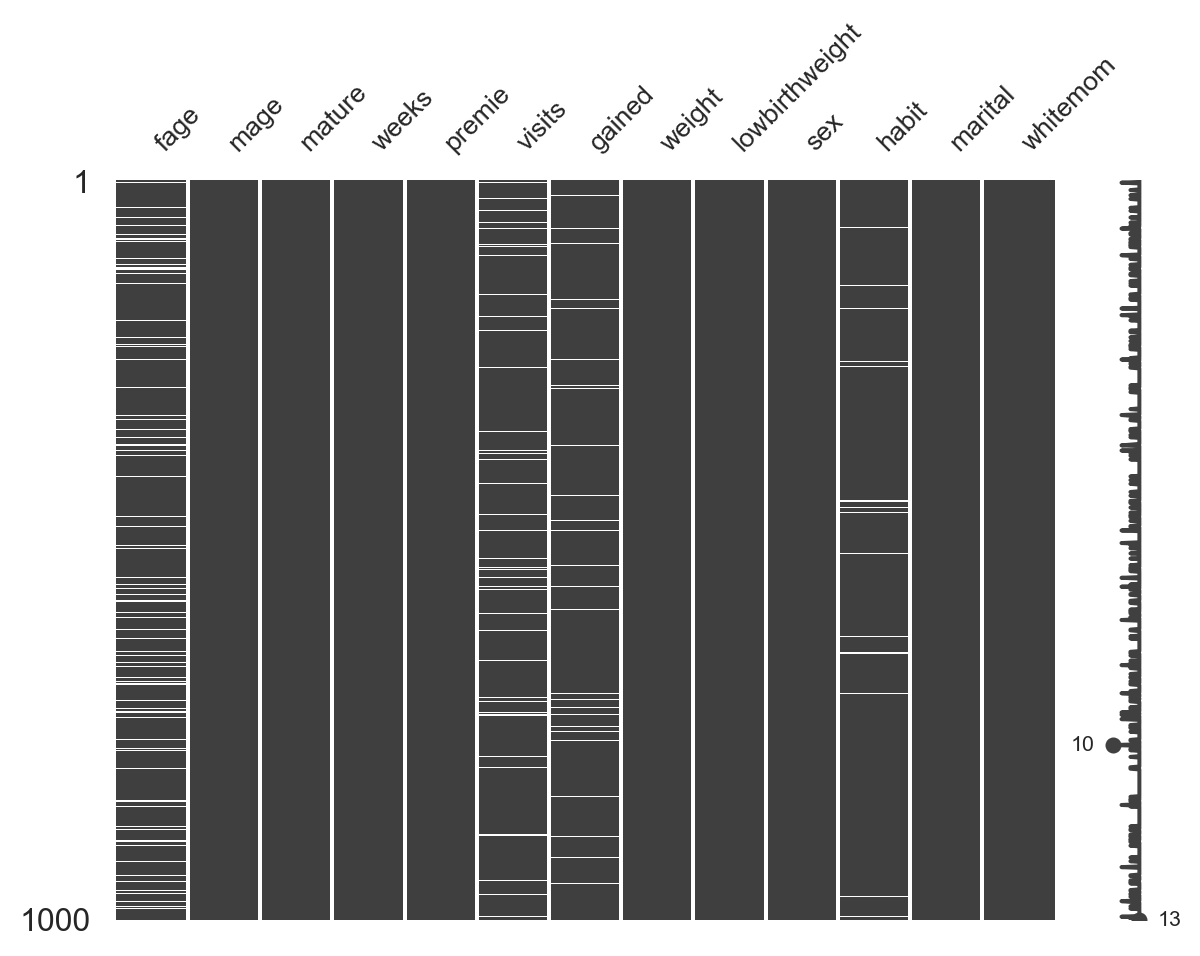

In [15]:
#| fig-align: "center"
msno.matrix(births14, figsize = (7, 5), fontsize = 10)
plt.tight_layout()

In [16]:
births14.describe(exclude = [np.number])

mature     premie lowbirthweight   sex      habit  marital  \
count          1000       1000           1000  1000        981     1000   
unique            2          2              2     2          2        2   
top     younger mom  full term        not low  male  nonsmoker  married   
freq            841        876            919   505        867      594   

       whitemom  
count      1000  
unique        2  
top       white  
freq        765

In [17]:
#| echo: false
# Select categorical columns
categorical_cols = births14.select_dtypes(include = ['object', 'category']).columns

# Initialize a dictionary to store results
category_analysis = {}

# Loop through each categorical column
for col in categorical_cols:
    counts = births14[col].value_counts()
    proportions = births14[col].value_counts(normalize=True)
    unique_levels = births14[col].unique()
    
    # Store results in dictionary
    category_analysis[col] = {
        'Unique Levels': unique_levels,
        'Counts': counts,
        'Proportions': proportions
    }

# Print results
for col, data in category_analysis.items():
    print(f"Analysis for {col}:\n")
    print("Unique Levels:", data['Unique Levels'])
    print("\nCounts:\n", data['Counts'])
    print("\nProportions:\n", data['Proportions'])
    print("\n" + "-"*50 + "\n")

Analysis for mature:

Unique Levels: ['younger mom' 'mature mom']

Counts:
 mature
younger mom    841
mature mom     159
Name: count, dtype: int64

Proportions:
 mature
younger mom    0.841
mature mom     0.159
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for premie:

Unique Levels: ['full term' 'premie']

Counts:
 premie
full term    876
premie       124
Name: count, dtype: int64

Proportions:
 premie
full term    0.876
premie       0.124
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for lowbirthweight:

Unique Levels: ['not low' 'low']

Counts:
 lowbirthweight
not low    919
low         81
Name: count, dtype: int64

Proportions:
 lowbirthweight
not low    0.919
low        0.081
Name: proportion, dtype: float64

--------------------------------------------------

Analysis for sex:

Unique Levels: ['male' 'female']

Counts:
 sex
male      505
female    495
Name: count, dtype: int64

Propo

In [18]:
#| eval: false
#| code-line-numbers: "1-26|2|5|8-11|14-17|21-26"
# Select categorical columns
categorical_cols = births14.select_dtypes(include = ['object', 'category']).columns

# Initialize a dictionary to store results
category_analysis = {}

# Loop through each categorical column
for col in categorical_cols:
    counts = births14[col].value_counts()
    proportions = births14[col].value_counts(normalize=True)
    unique_levels = births14[col].unique()
    
    # Store results in dictionary
    category_analysis[col] = {
        'Unique Levels': unique_levels,
        'Counts': counts,
        'Proportions': proportions
    }

# Print results
for col, data in category_analysis.items():
    print(f"Analysis for {col}:\n")
    print("Unique Levels:", data['Unique Levels'])
    print("\nCounts:\n", data['Counts'])
    print("\nProportions:\n", data['Proportions'])
    print("\n" + "-"*50 + "\n")

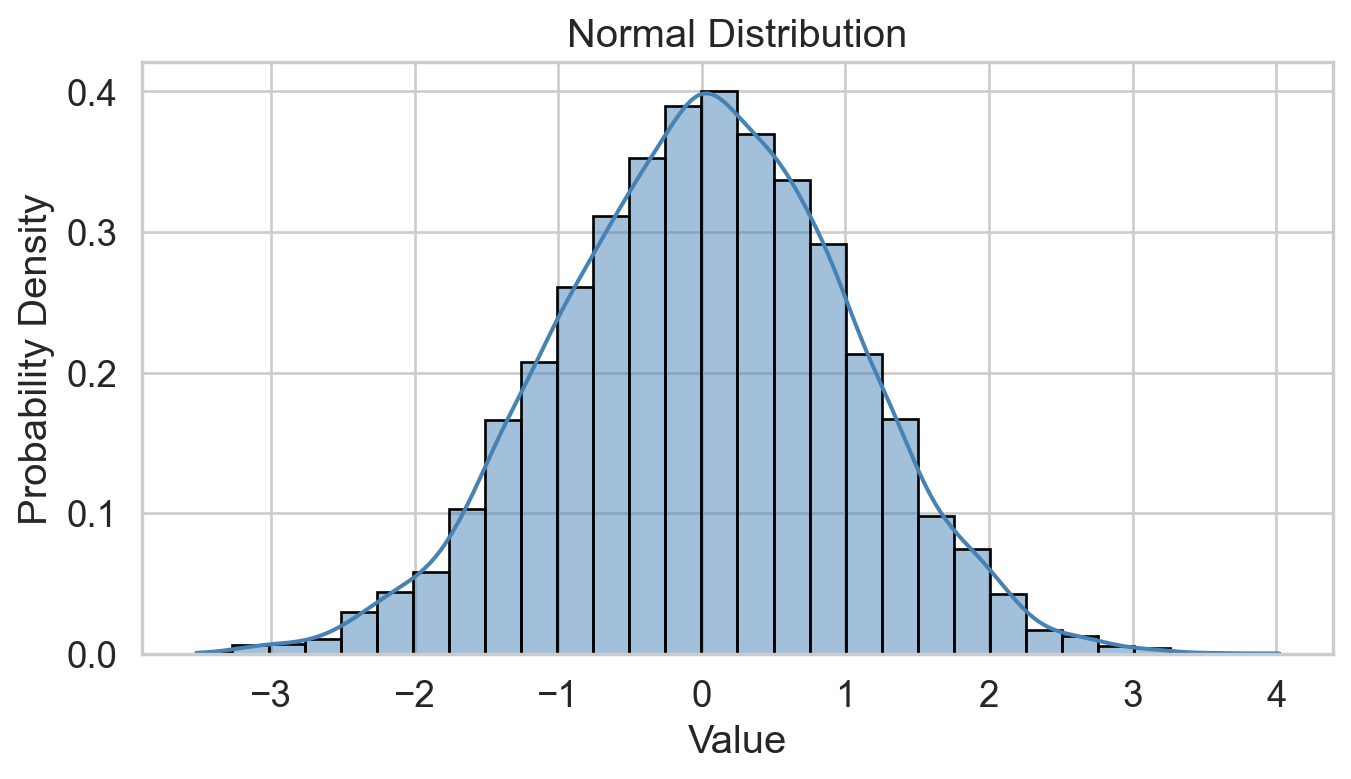

In [19]:
#| echo: false
#| fig-align: center
# Parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Setting up the plot font scale
sns.set_theme(font_scale = 1.25)

# Setting seaborn style
sns.set_style("whitegrid")

# Generate a sample from a normal distribution
data = np.random.normal(loc = mu, scale = sigma, size = 10000)

# Plot the distribution using seaborn's distplot
plt.figure(figsize = (8, 4))
sns.histplot(data, kde = True, color = 'steelblue', bins = 30, stat = 'density', edgecolor = 'black')

# Add labels and title to the plot
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

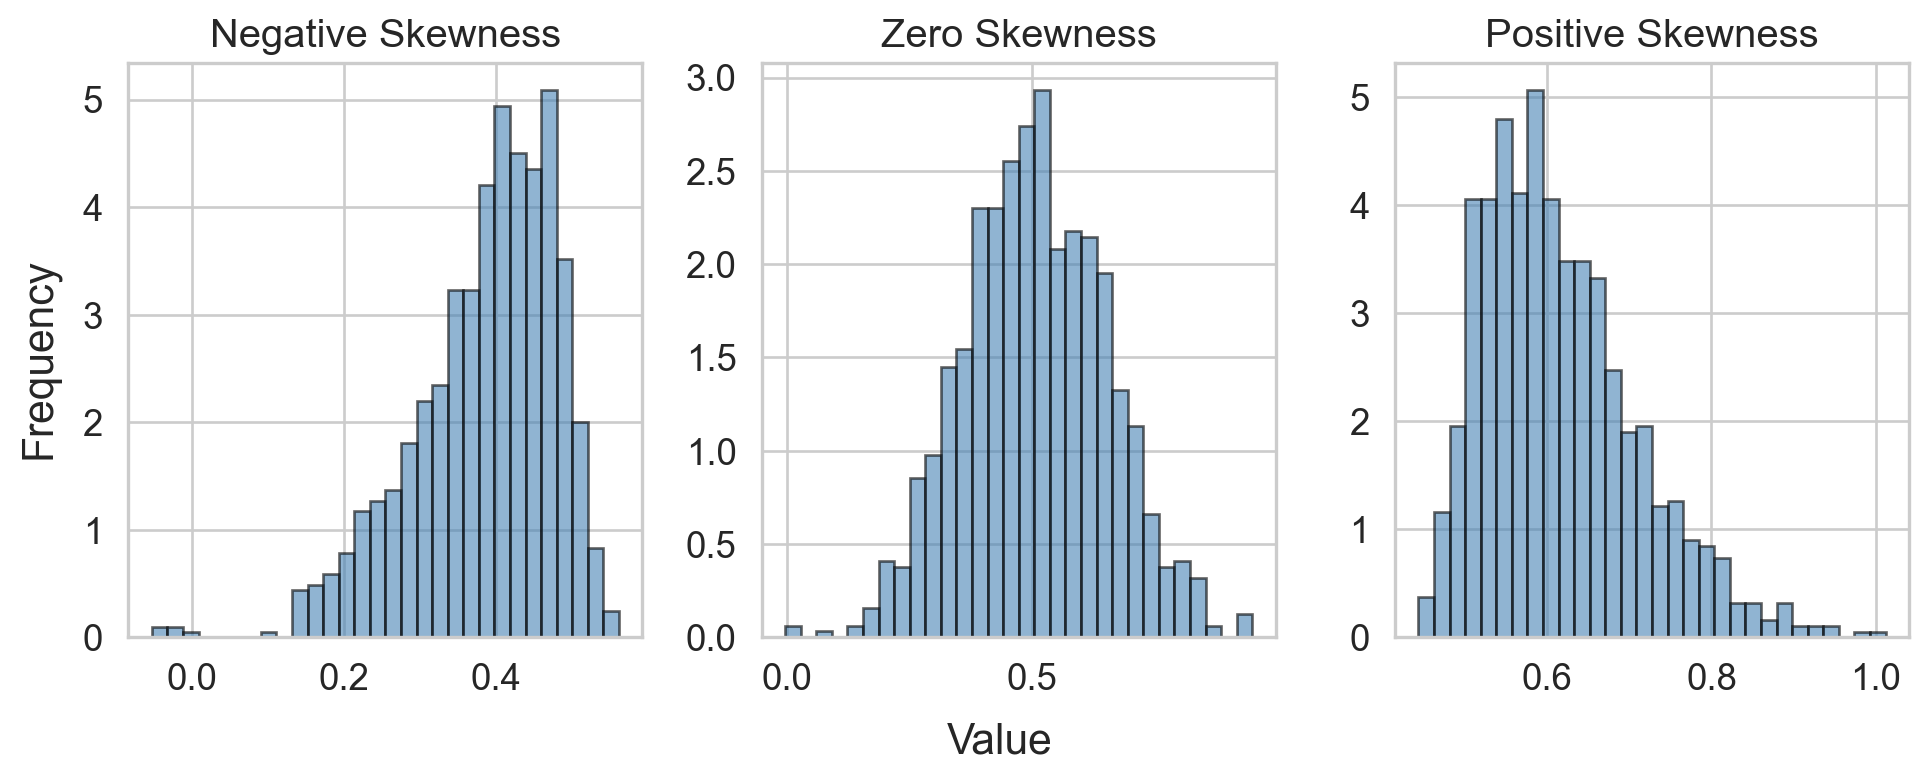

In [20]:
#| echo: false
#| fig-align: "center"
# Parameters for the distributions
params = {
    'Negative Skewness': -5,  # Negative skewness parameter for skewnorm
    'Zero Skewness': 0,       # Zero skewness (normal distribution) for skewnorm
    'Positive Skewness': 5    # Positive skewness parameter for skewnorm
}

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(1, 3, figsize = (10, 4))

# Generate and plot the data for each type of skewness
for ax, (label, param) in zip(axs, params.items()):
    # Generate a skewed dataset
    data = skewnorm.rvs(a = param, loc = 0.5, scale = 0.15, size = 1000)

    # Plot the histogram of the data
    ax.hist(data, bins = 30, density=True, color = 'steelblue', alpha = 0.6, edgecolor='black')
    
    # Set title and labels
    ax.set_title(label)
    
# Set common labels
fig.text(0.5, 0, 'Value', ha = 'center', va = 'center', fontsize = 16)
fig.text(0, 0.5, 'Frequency', ha = 'center', va = 'center', rotation = 'vertical', fontsize = 16)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

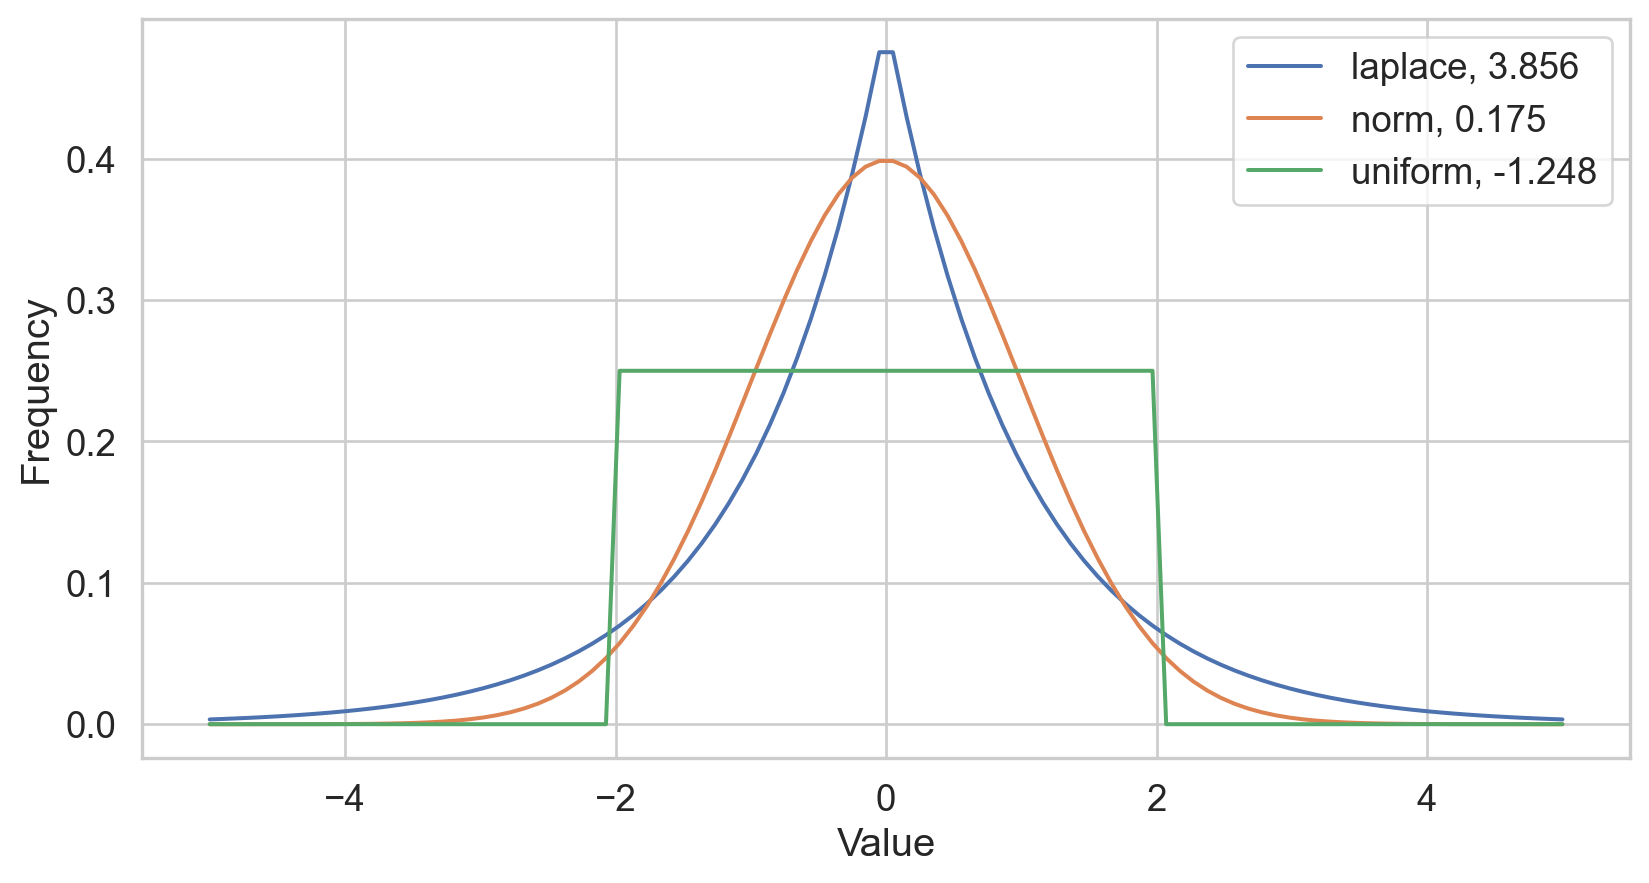

In [21]:
#| echo: false
#| fig-align: "center"
x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

# Create kurtosis plots
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size = 1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    
# Show the plot
plt.show()

In [22]:
#| echo: false
# Define skewness parameters
skew_params = {
    'Negative Skew': -10,
    'Normal Distn': 0,
    'Positive Skew': 10
}

# Number of samples
n_samples = 100

# Generate data for each skewness parameter
data = {skew_type: skewnorm.rvs(a = skew_param, size = n_samples) for skew_type, skew_param in skew_params.items()}

# Create DataFrame
df = pd.DataFrame(data)

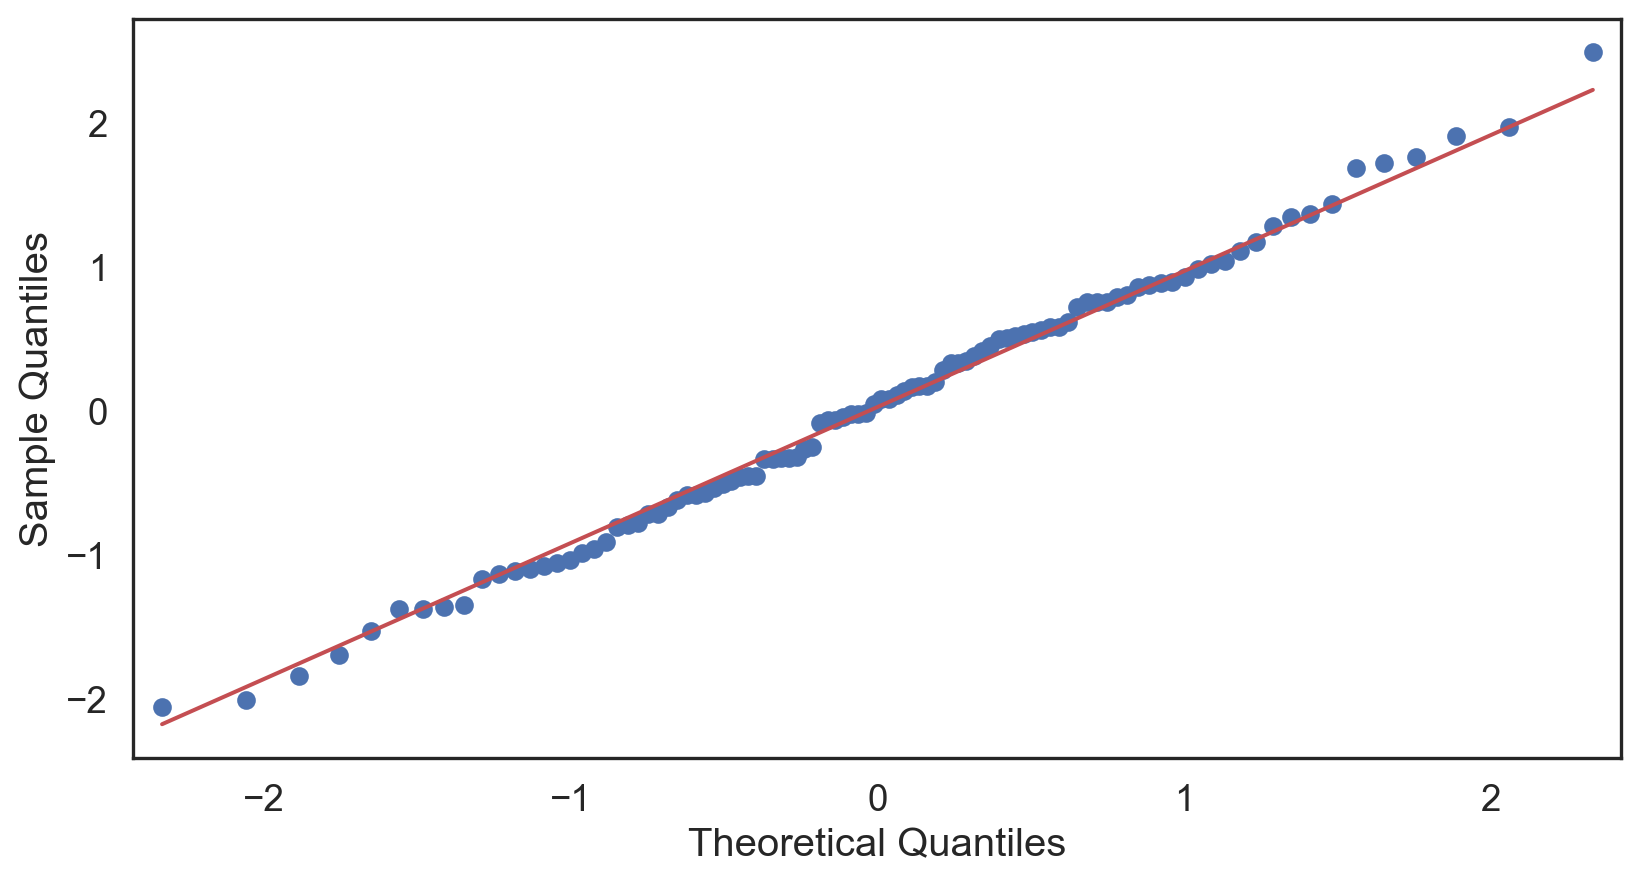

In [23]:
#| fig-align: center
#| echo: false
# Change theme to "white"
sns.set_style("white")

# Q-Q plot of normal distribution
sm.qqplot(data['Normal Distn'], line = 's')

# Display the plot
plt.show()

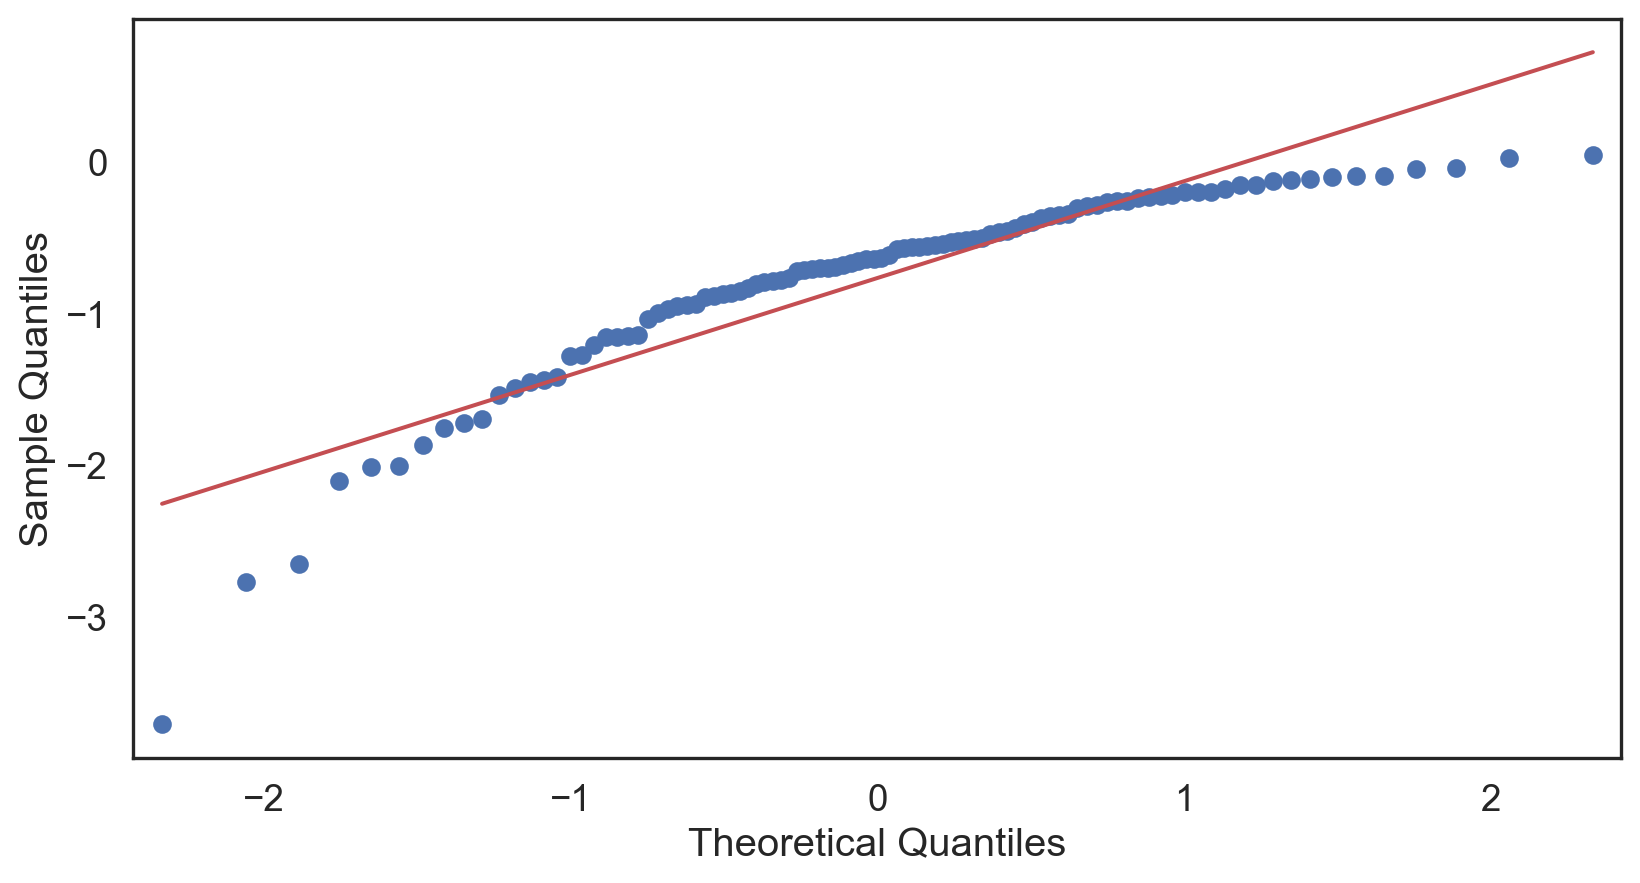

In [24]:
#| fig-align: center
#| echo: false
# Change theme to "white"
sns.set_style("white")

# Q-Q plot of negative skew
sm.qqplot(data['Negative Skew'], line = 's')

# Display the plot
plt.show()

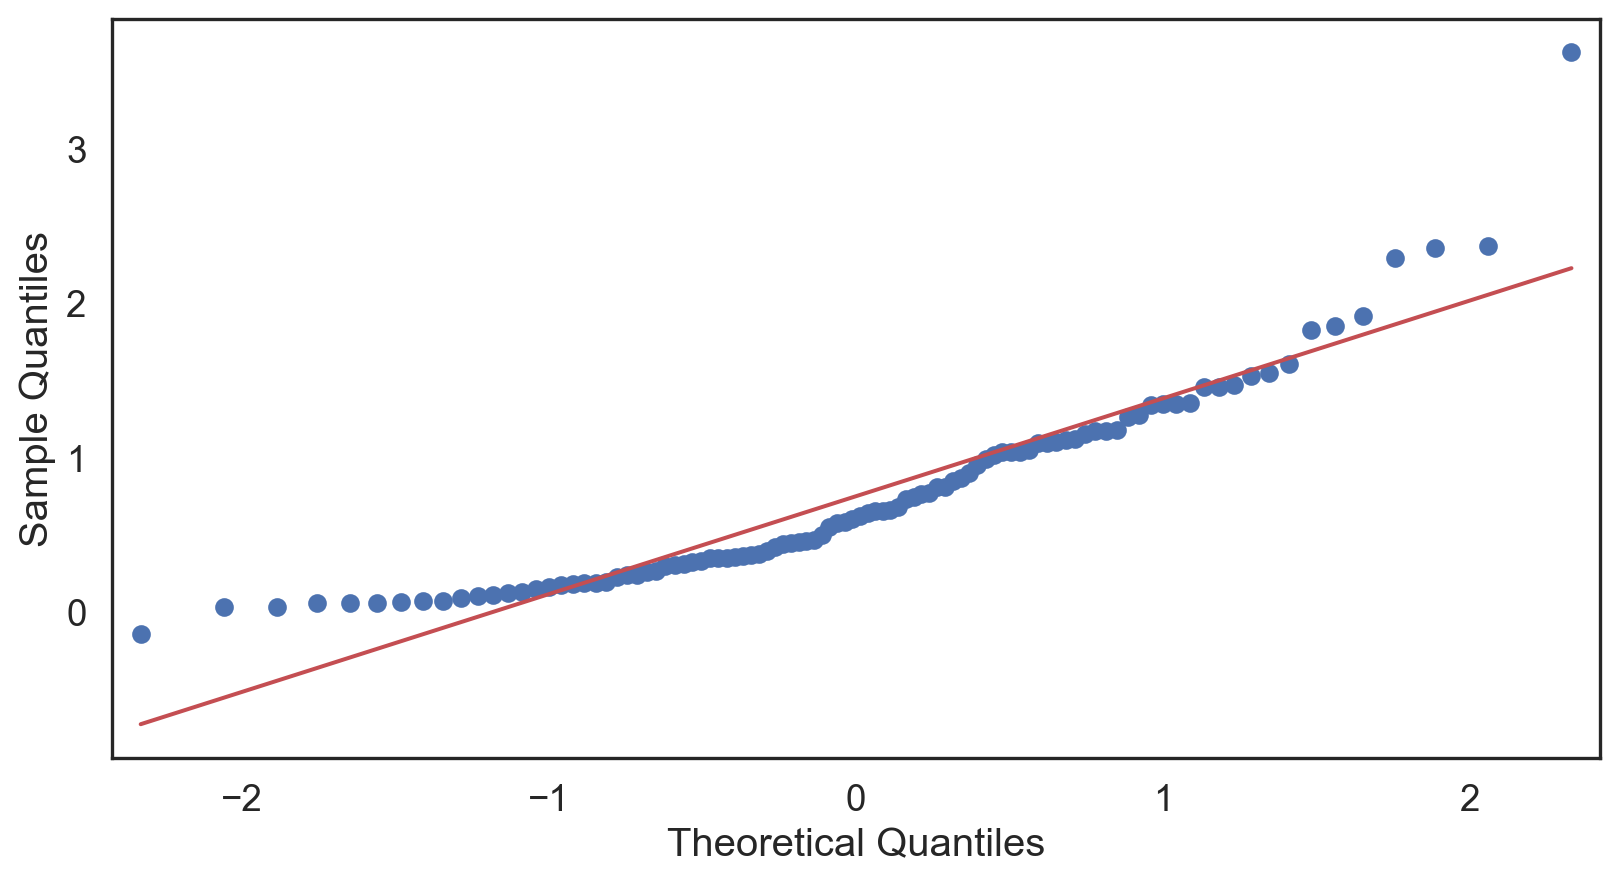

In [25]:
#| fig-align: center
#| echo: false

# Change theme to "white"
sns.set_style("white")

# Q-Q plot of positive skew
sm.qqplot(data['Positive Skew'], line = 's')

# Display the plot
plt.show()

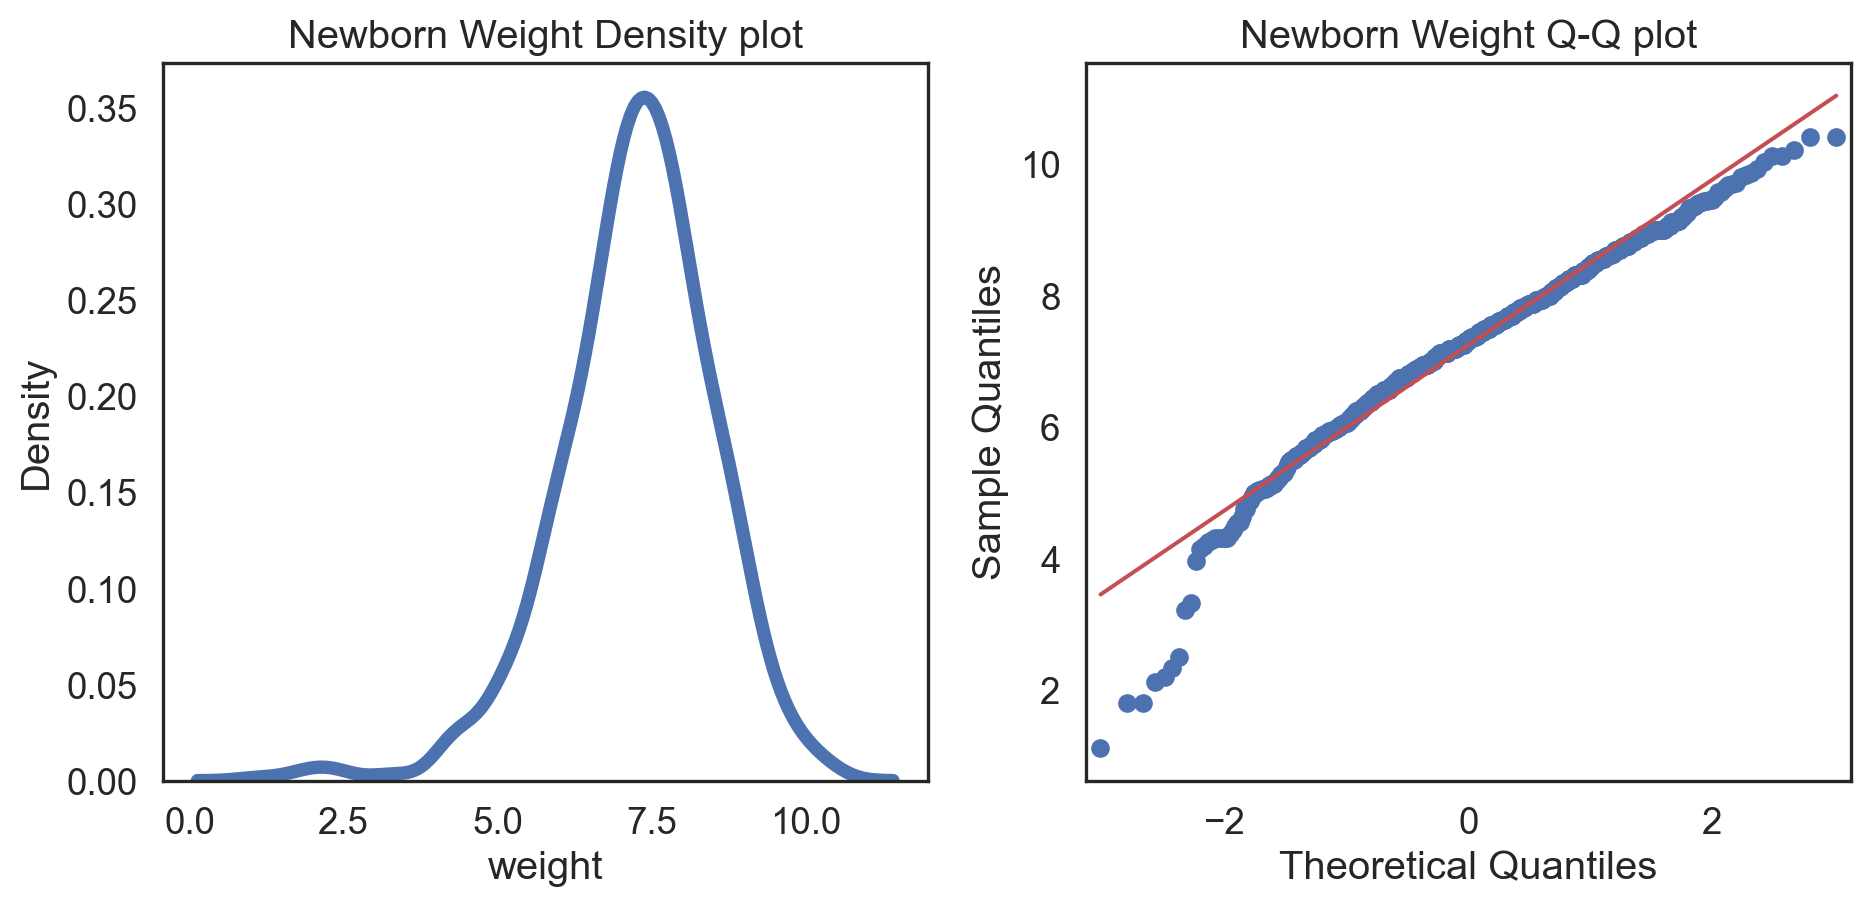

In [26]:
#| code-fold: true
#| code-line-numbers: "1-24|2,5|8|11|14|17,18|21-24"
#| fig-align: center

# Change theme to "white"
sns.set_style("white")

# Make a copy of the data 
dataCopy = births14.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Specify desired column
i_col = dataCopyFin.weight

# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Newborn Weight Density plot')

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Newborn Weight Q-Q plot')
plt.tight_layout()
plt.show()

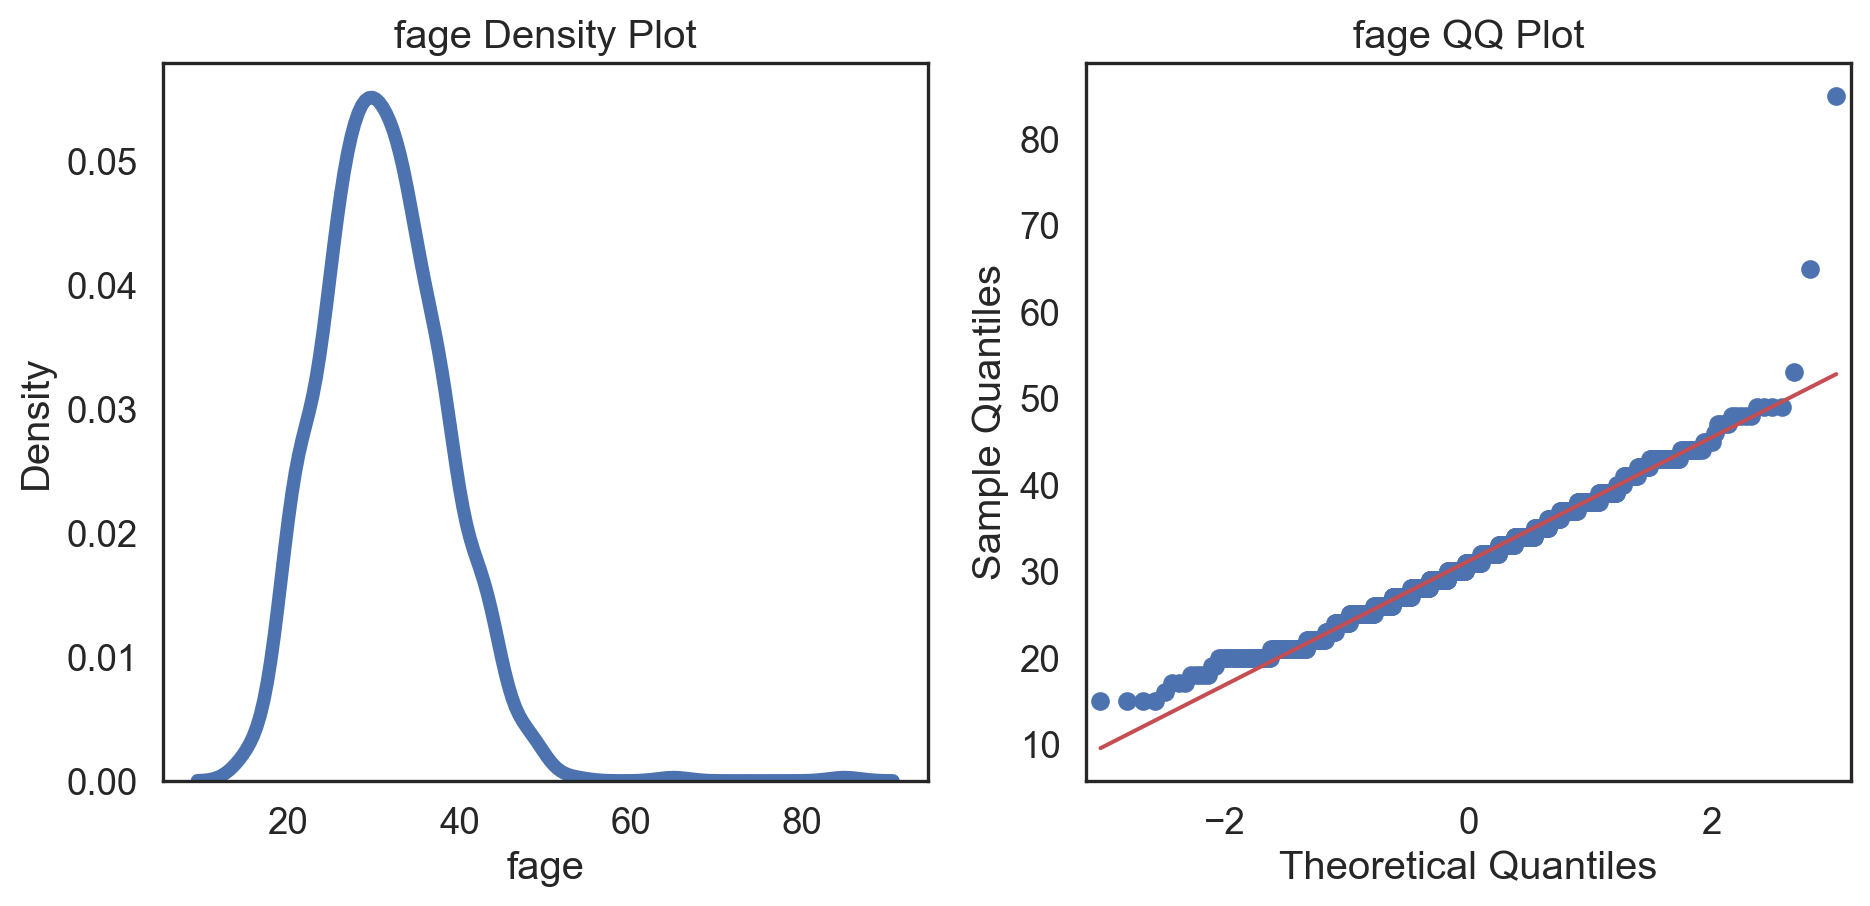

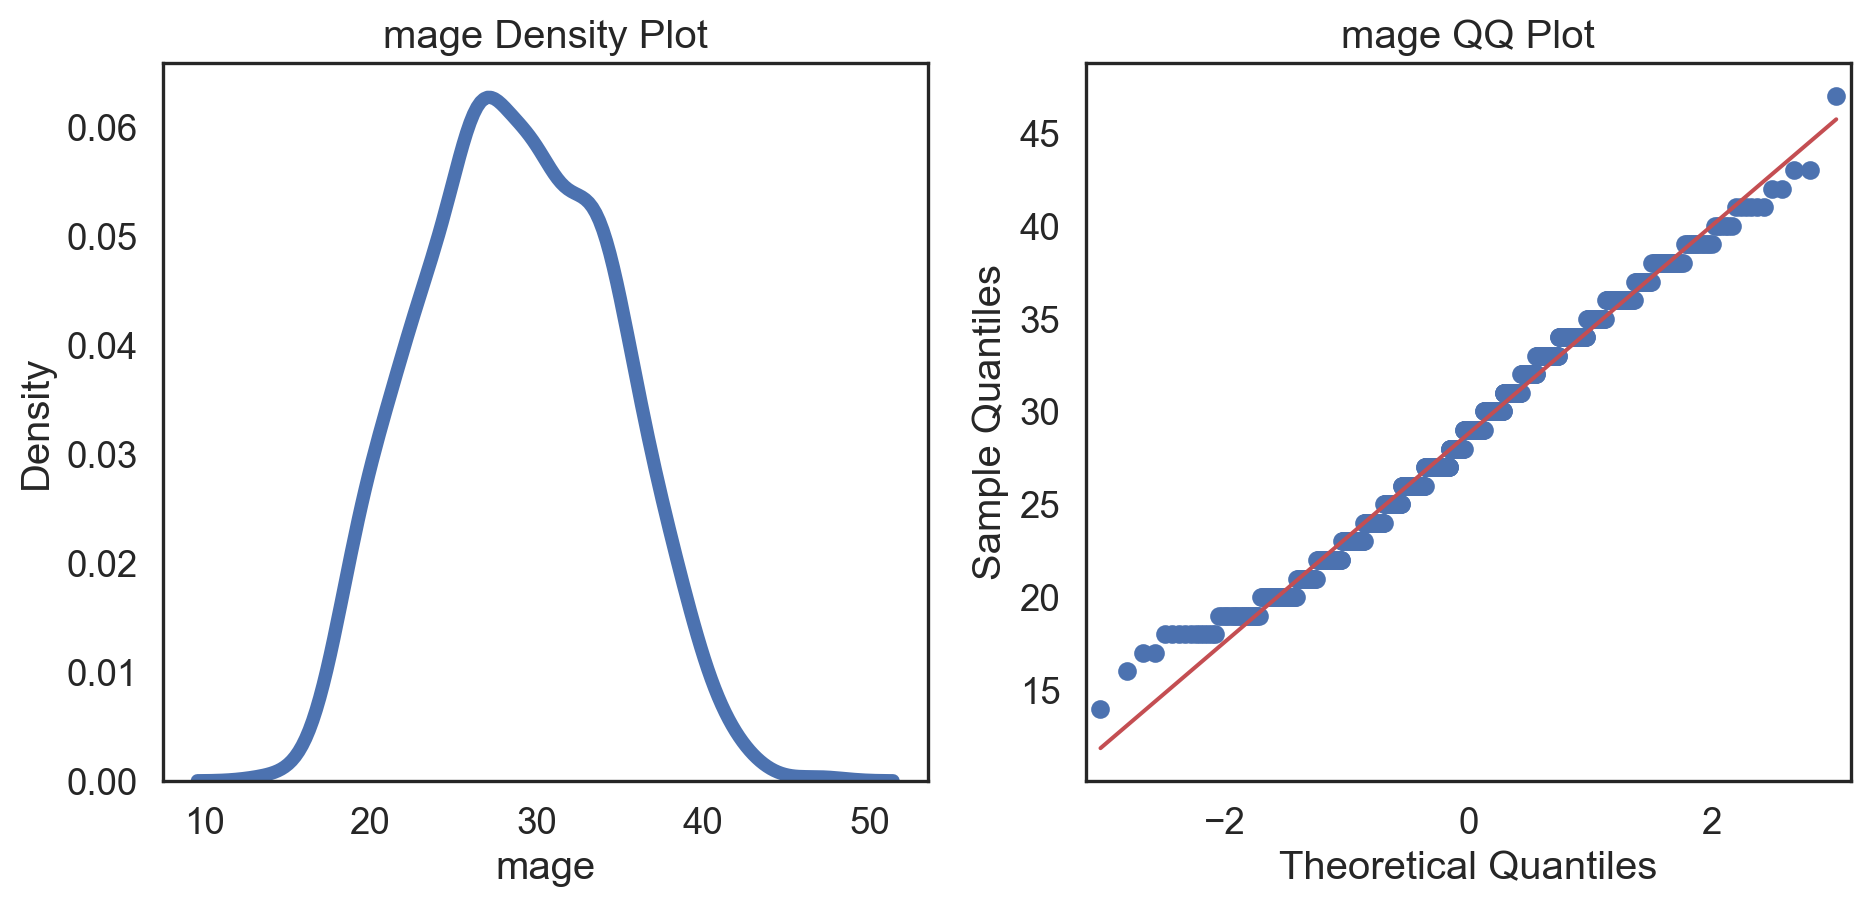

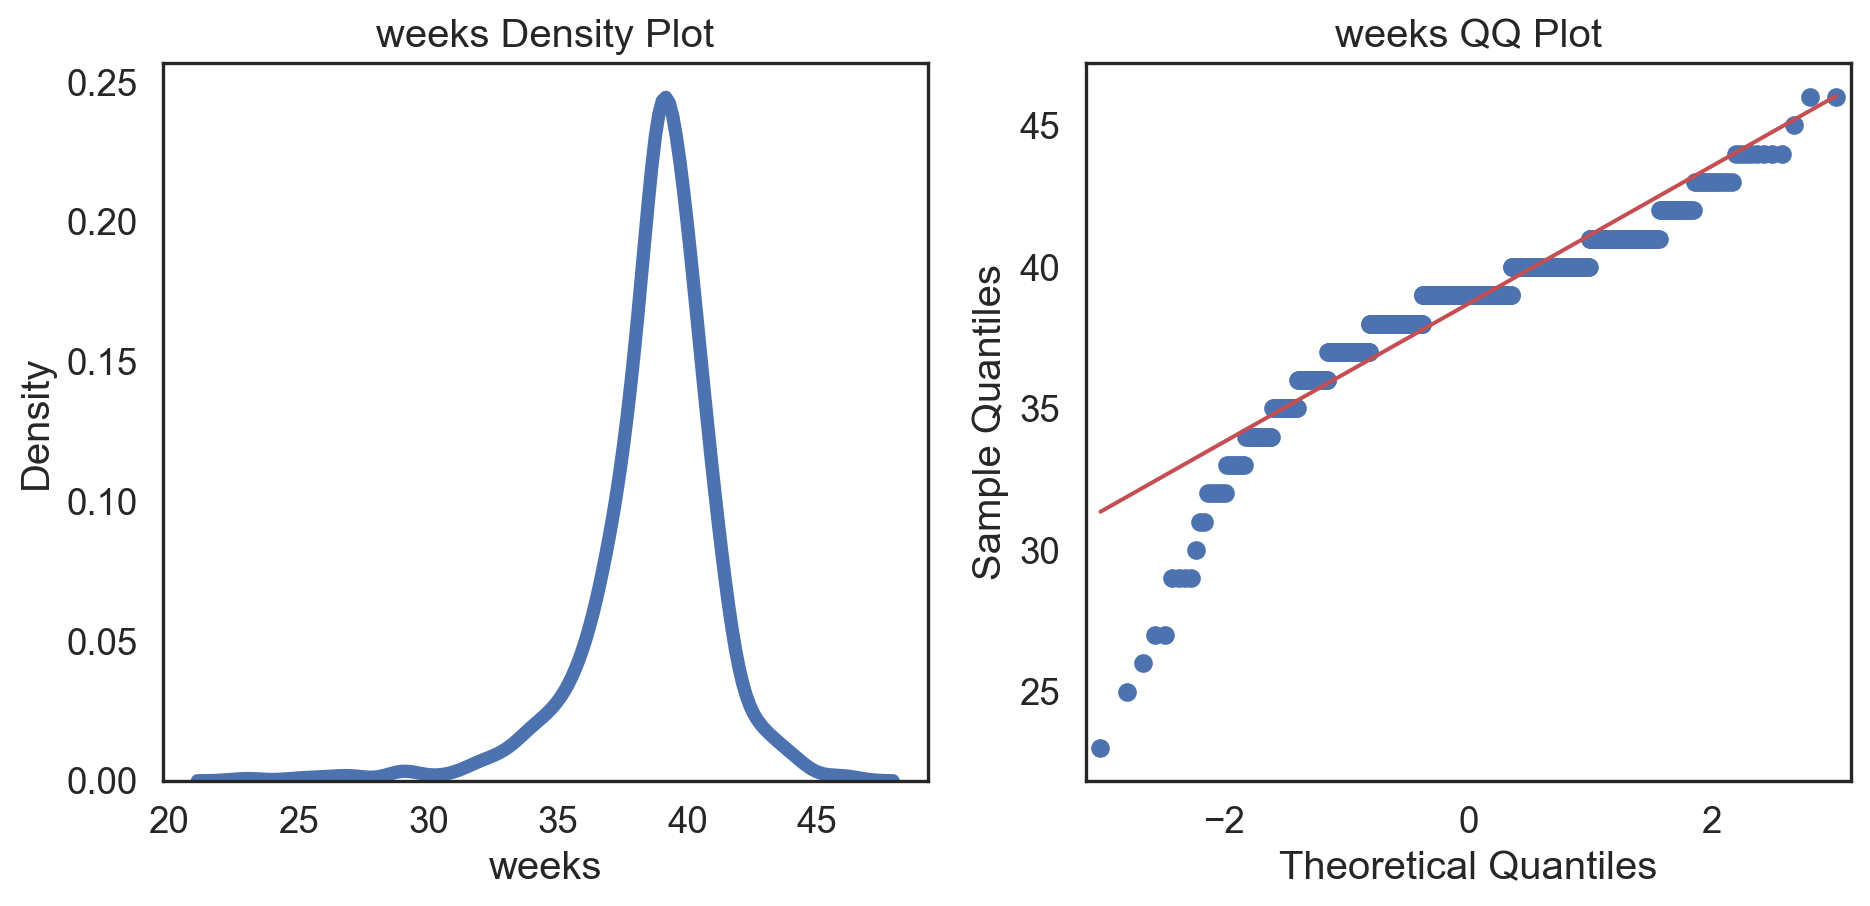

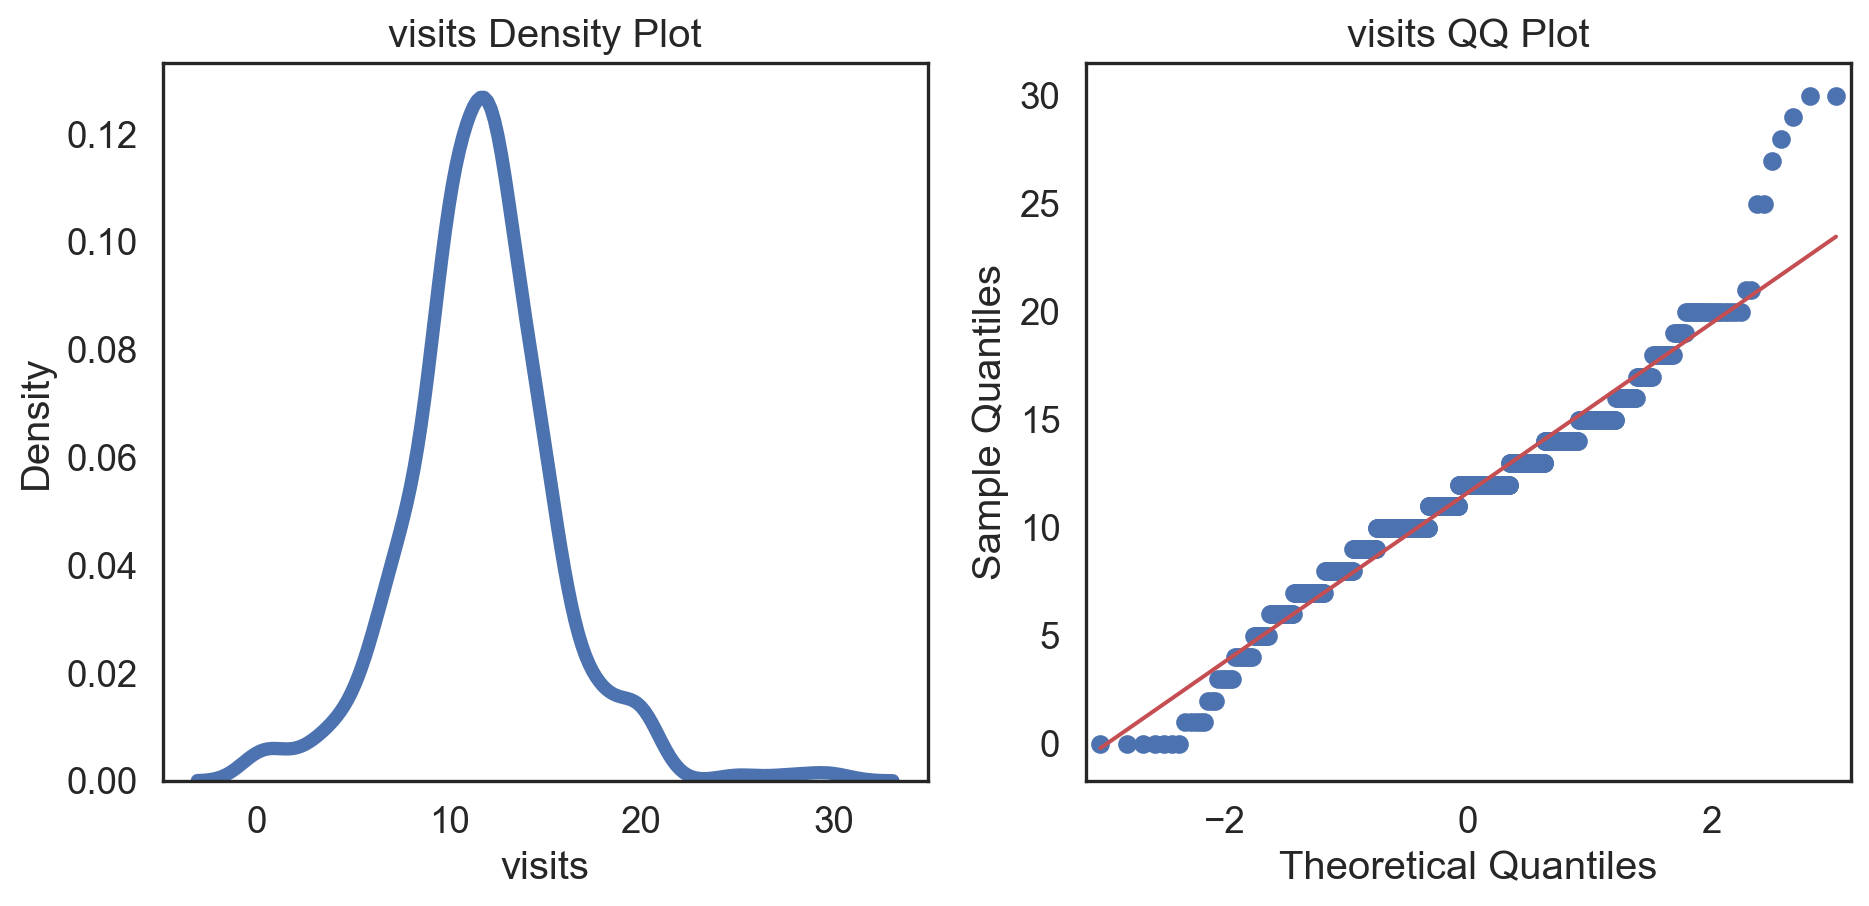

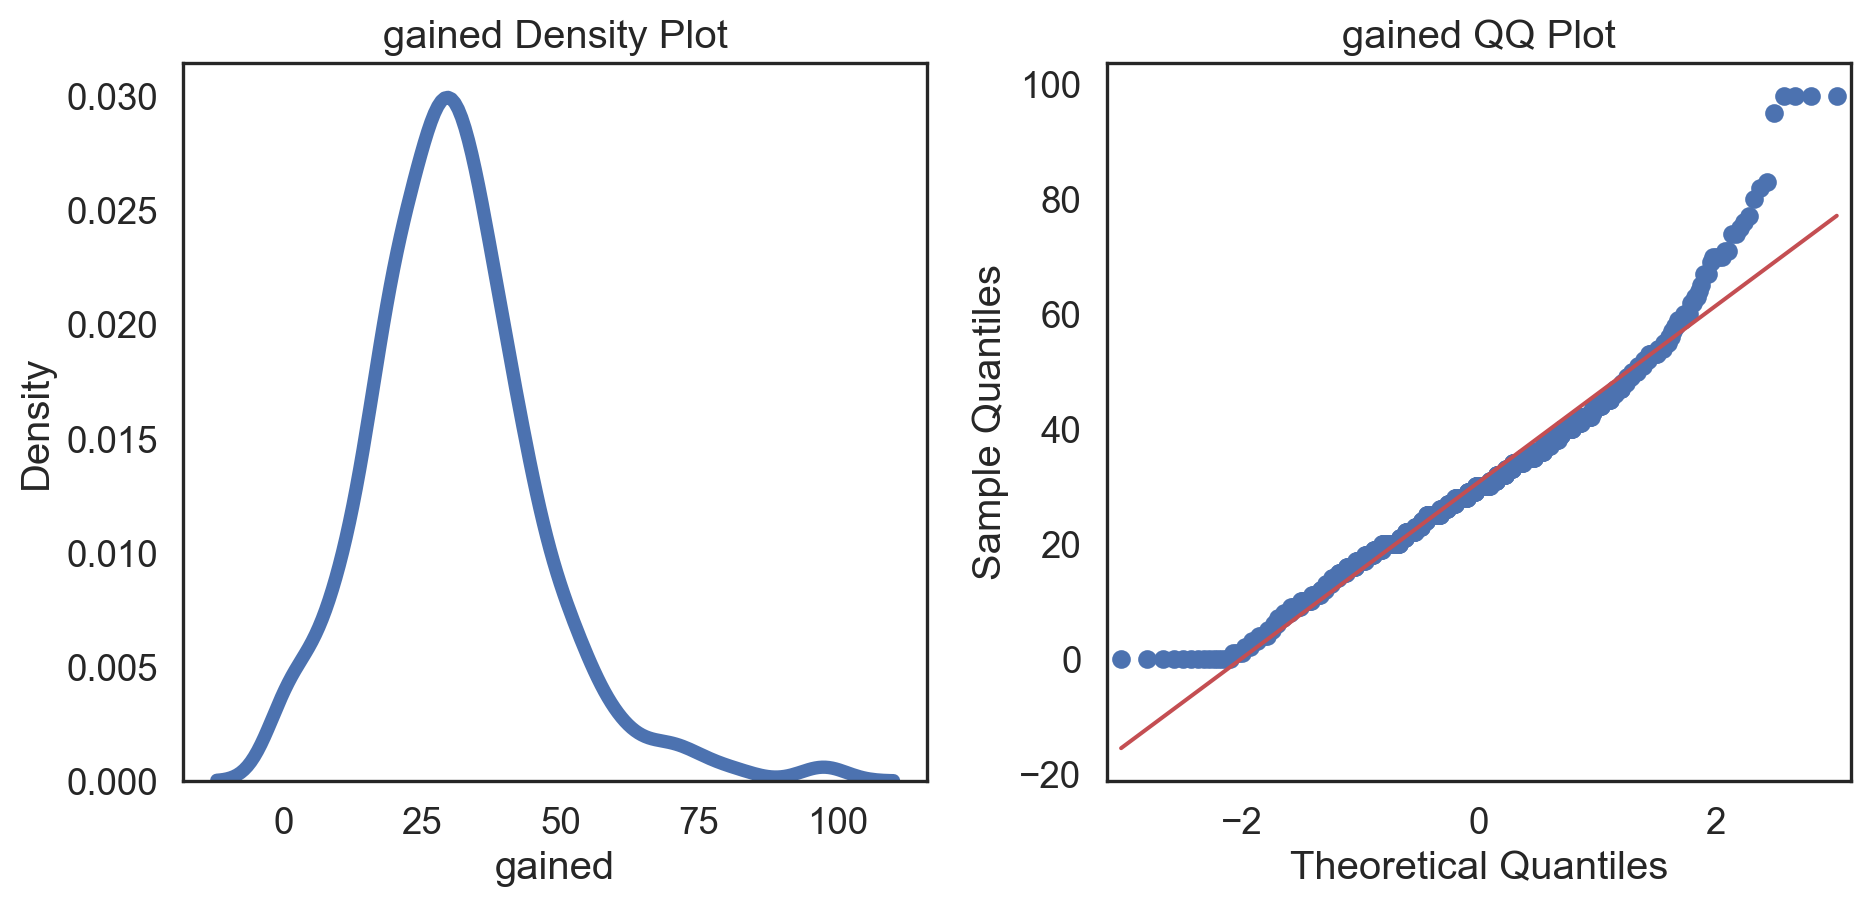

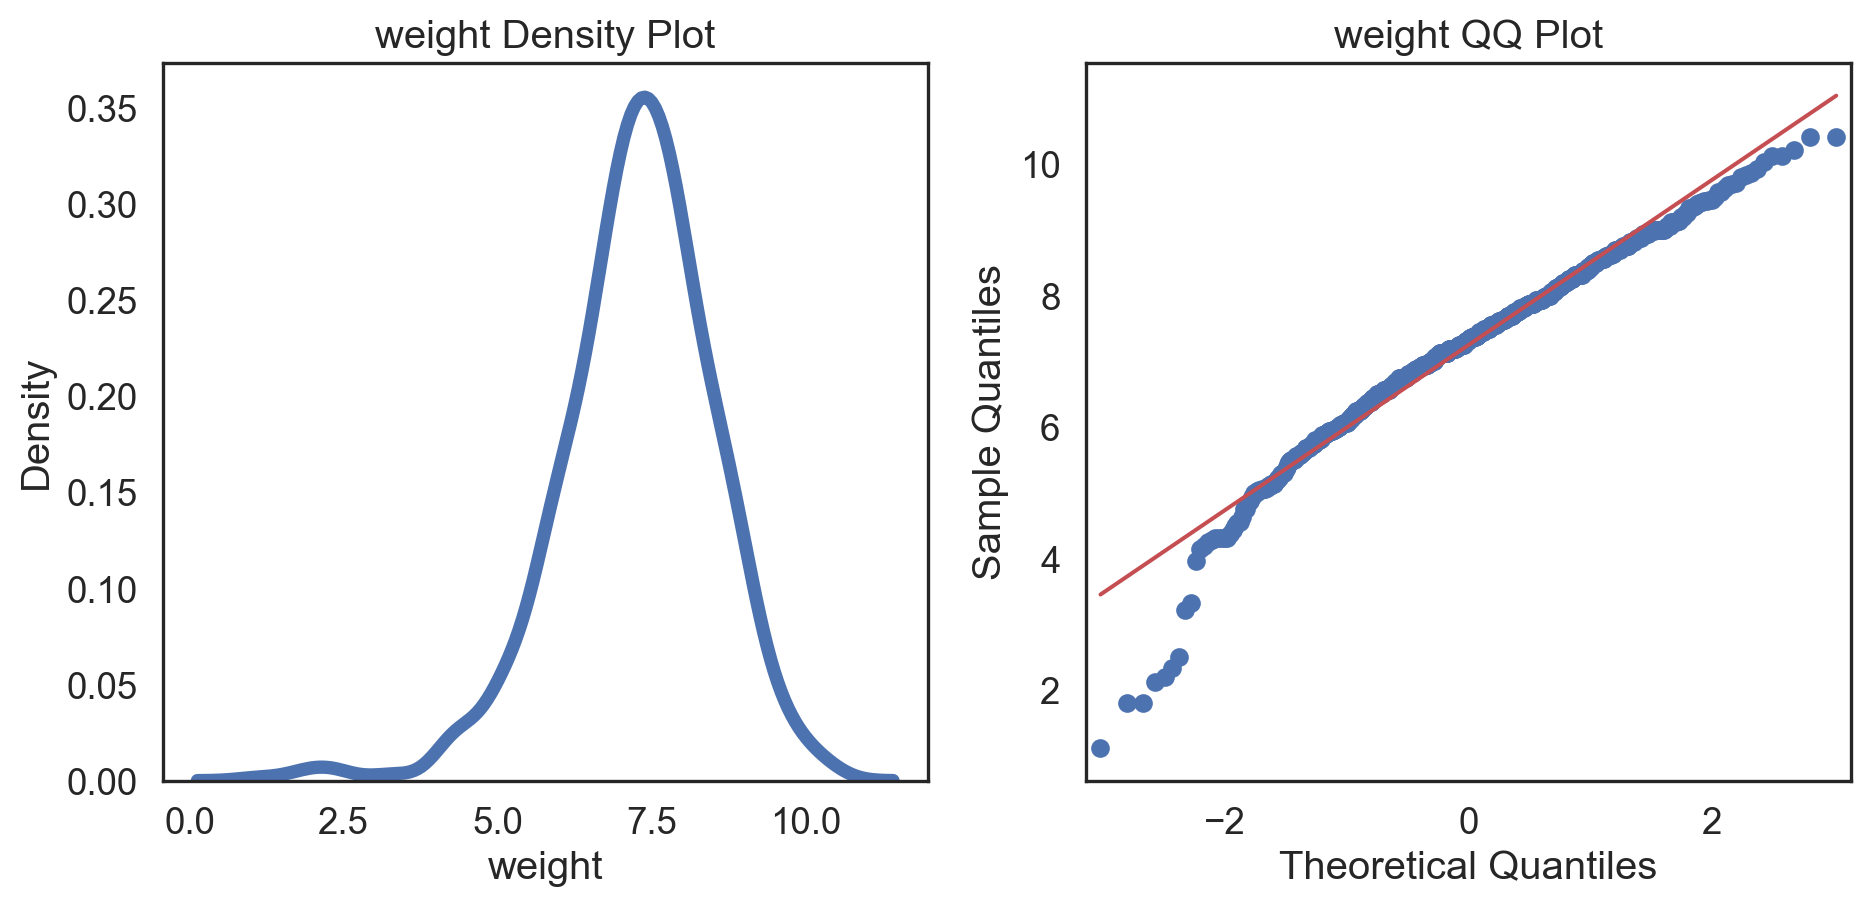

In [27]:
#| code-fold: true
#| code-line-numbers: "1-24|2|5,8|11,13|16,17|20,21|23,24"
#| fig-align: center

# Change theme to "white"
sns.set_style("white")

# Make a copy of the data 
dataCopy = births14.copy()

# Select only numerical columns
dataRed = dataCopyFin.select_dtypes(include=np.number)

# Fill the subplots
for k in dataRed.columns:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)
    
    # Density plot
    sns.kdeplot(dataRed[k], linewidth = 5, ax = ax1)
    ax1.set_title(f'{k} Density Plot')
    
    # Q-Q plot
    sm.qqplot(dataRed[k], line = 's', ax = ax2)
    ax2.set_title(f'{k} QQ Plot')

    plt.tight_layout()
    plt.show()

In [28]:
birds = pd.read_csv("data/birds.csv")
birds['date'] = pd.to_datetime(birds['date'])

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44738/1045204650.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birds['date'] = pd.to_datetime(birds['date'])


In [29]:
birds.head()

opid           operator       atype              remarks phase_of_flt  \
0  AAL  AMERICAN AIRLINES       MD-80            NO DAMAGE      Descent   
1  USA         US AIRWAYS  FK-28-4000  2 BIRDS, NO DAMAGE.        Climb   
2  AAL  AMERICAN AIRLINES   B-727-200                  NaN     Approach   
3  AAL  AMERICAN AIRLINES       MD-82                  NaN        Climb   
4  AAL  AMERICAN AIRLINES       MD-82            NO DAMAGE        Climb   

   ac_mass  num_engs       date time_of_day state  height  speed effect  \
0      4.0       2.0 1990-09-30       Night    IL  7000.0  250.0    NaN   
1      4.0       2.0 1993-11-29         Day    MD    10.0  140.0    NaN   
2      4.0       3.0 1993-08-13         Day    TN   400.0  140.0    NaN   
3      4.0       2.0 1993-10-07         Day    VA   100.0  200.0    NaN   
4      4.0       2.0 1993-09-25         Day    SC    50.0  170.0    NaN   

          sky                species birds_seen birds_struck  
0    No Cloud  UNKNOWN BIRD - MEDIUM        NaN            1  
1    No Cloud  UNKNOWN BIRD - MEDIUM     10-Feb       10-Feb  
2  Some Cloud   UNKNOWN BIRD - SMALL     10-Feb            1  
3    Overcast   UNKNOWN BIRD - SMALL        NaN            1  
4  Some Cloud   UNKNOWN BIRD - SMALL     10-Feb            1

In [30]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19302 entries, 0 to 19301
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   opid          19302 non-null  object        
 1   operator      19302 non-null  object        
 2   atype         19302 non-null  object        
 3   remarks       16516 non-null  object        
 4   phase_of_flt  17519 non-null  object        
 5   ac_mass       18018 non-null  float64       
 6   num_engs      17995 non-null  float64       
 7   date          19302 non-null  datetime64[ns]
 8   time_of_day   17225 non-null  object        
 9   state         18431 non-null  object        
 10  height        16109 non-null  float64       
 11  speed         12294 non-null  float64       
 12  effect        1973 non-null   object        
 13  sky           15723 non-null  object        
 14  species       19302 non-null  object        
 15  birds_seen    4764 non-null   object

In [31]:
birds.describe().round(2)

ac_mass  num_engs                           date    height     speed
count  18018.00  17995.00                          19302  16109.00  12294.00
mean       3.36      2.10  1994-08-25 09:46:40.994715520    754.68    136.10
min        1.00      1.00            1990-01-08 00:00:00      0.00      0.00
25%        3.00      2.00            1992-08-18 00:00:00      0.00    110.00
50%        4.00      2.00            1994-10-01 00:00:00     40.00    130.00
75%        4.00      2.00            1996-09-13 18:00:00    500.00    150.00
max        5.00      4.00            1999-10-16 00:00:00  32500.00    400.00
std        1.01      0.57                            NaN   1795.81     44.64

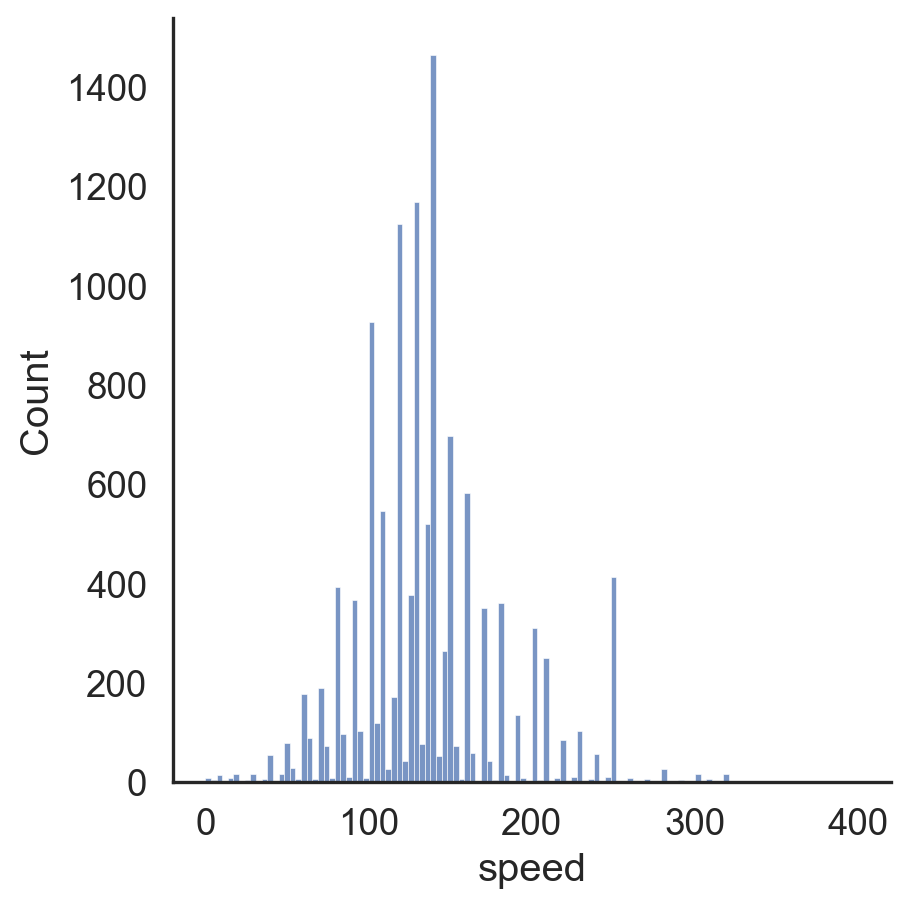

In [32]:
#| code-fold: true
#| code-line-numbers: 1-6|1,2|4,6
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data = birds, x = "speed")

plt.show()

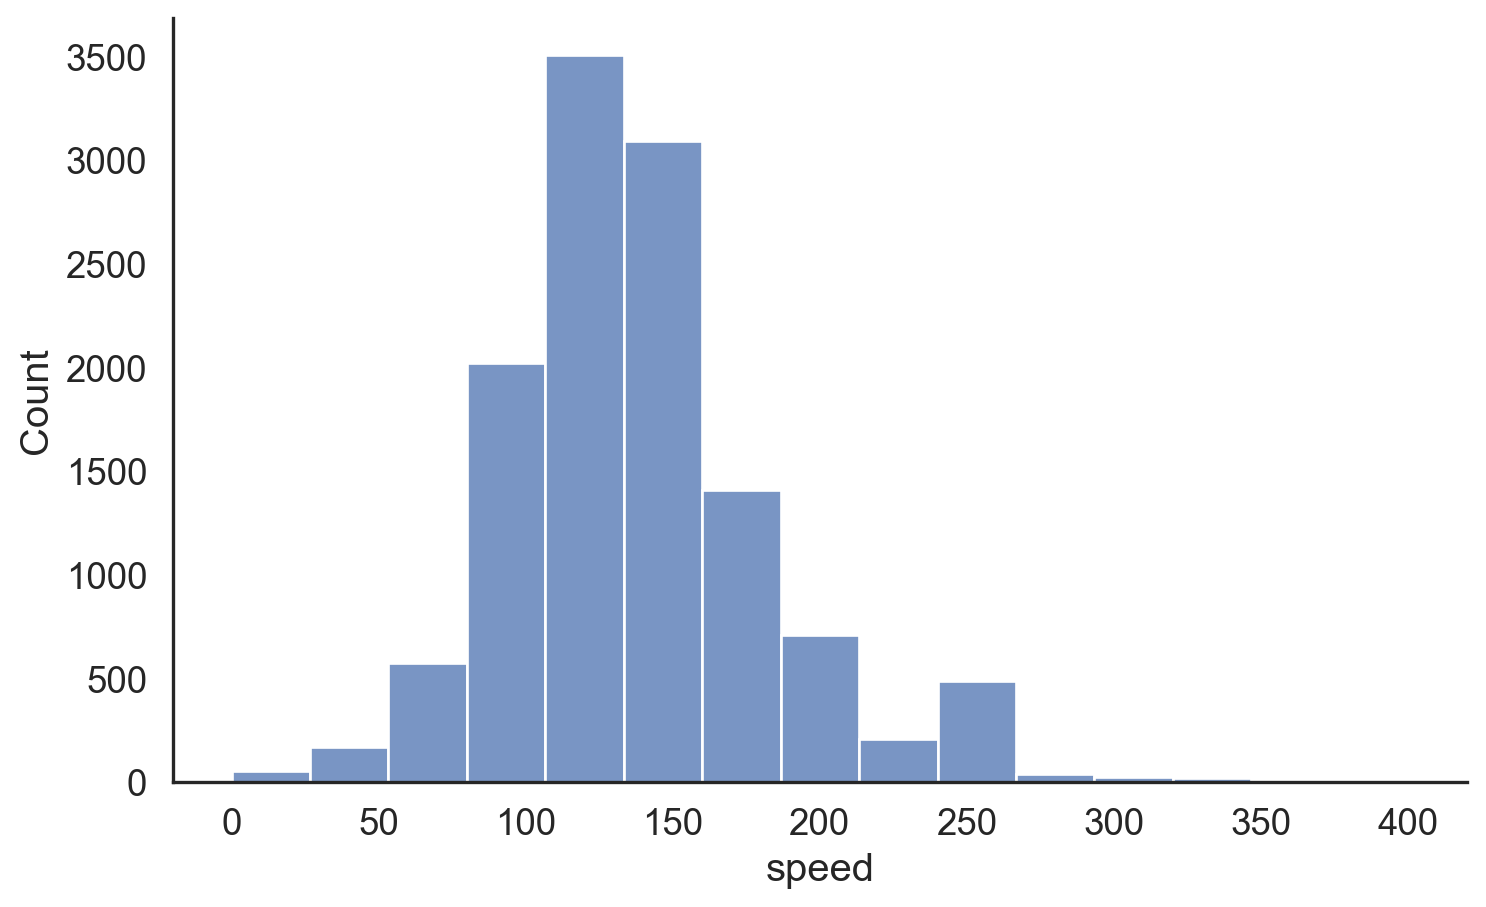

In [33]:
#| code-fold: true
#| code-line-numbers: 1-4|2
sns.displot(data = birds, x = "speed", 
            bins = 15, height = 5, aspect = 8/5)

plt.show()

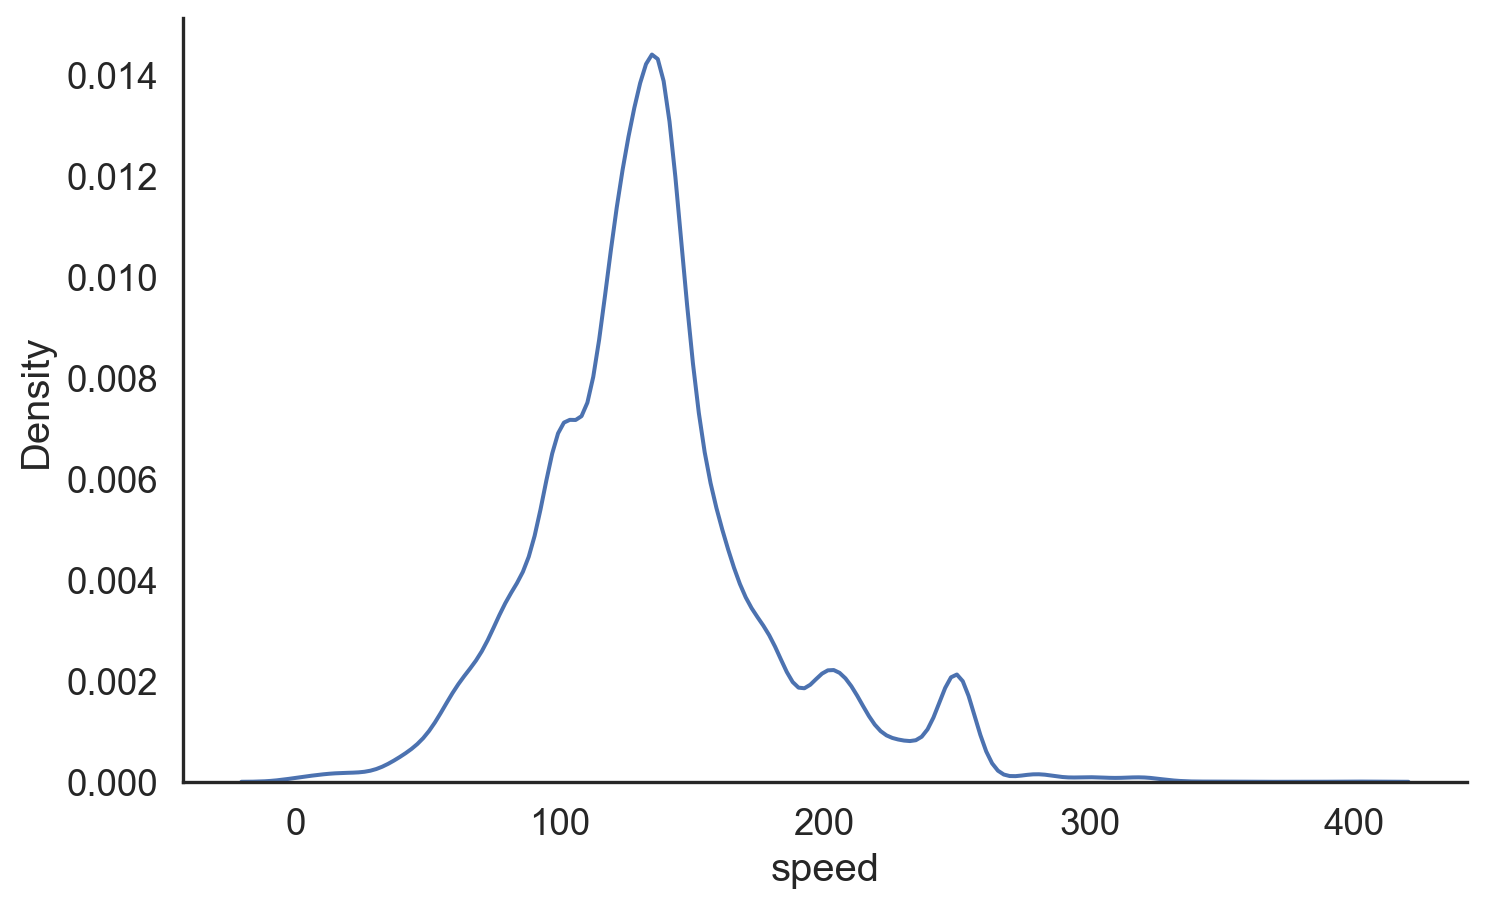

In [34]:
#| code-fold: true
#| code-line-numbers: 1-4|2
sns.displot(data = birds, x = "speed", 
            kind = 'kde', height = 5, aspect = 8/5)

plt.show()

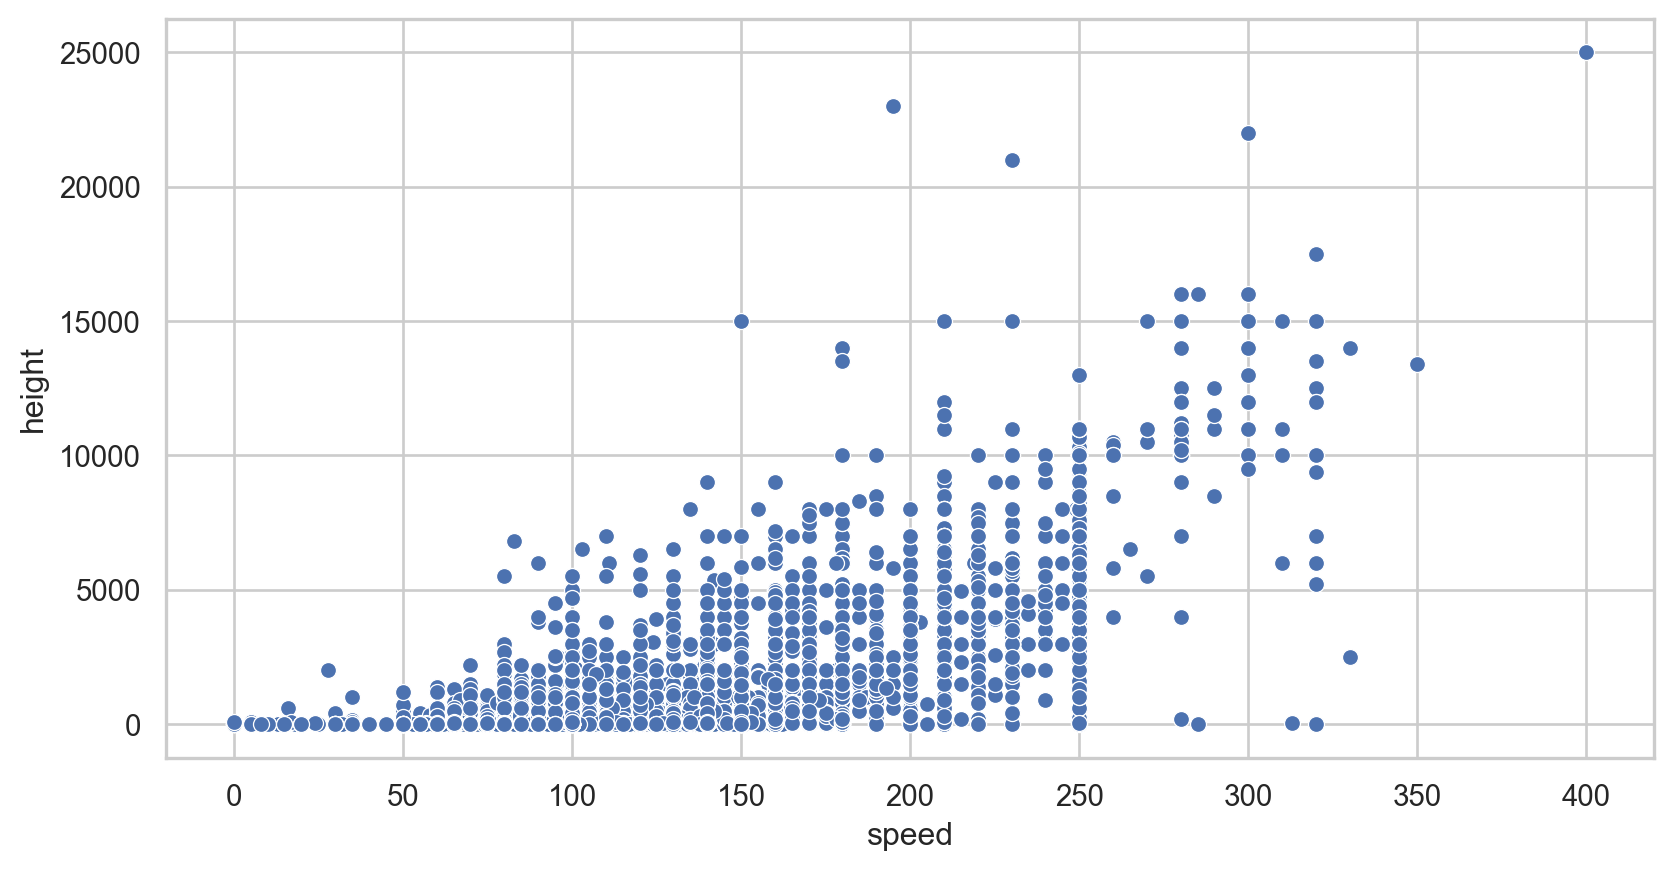

In [35]:
#| code-fold: true
#| code-line-numbers: 1-5|3

sns.set_theme(style = "whitegrid")

sns.scatterplot(data = birds, x = "speed", y = "height")

plt.show()

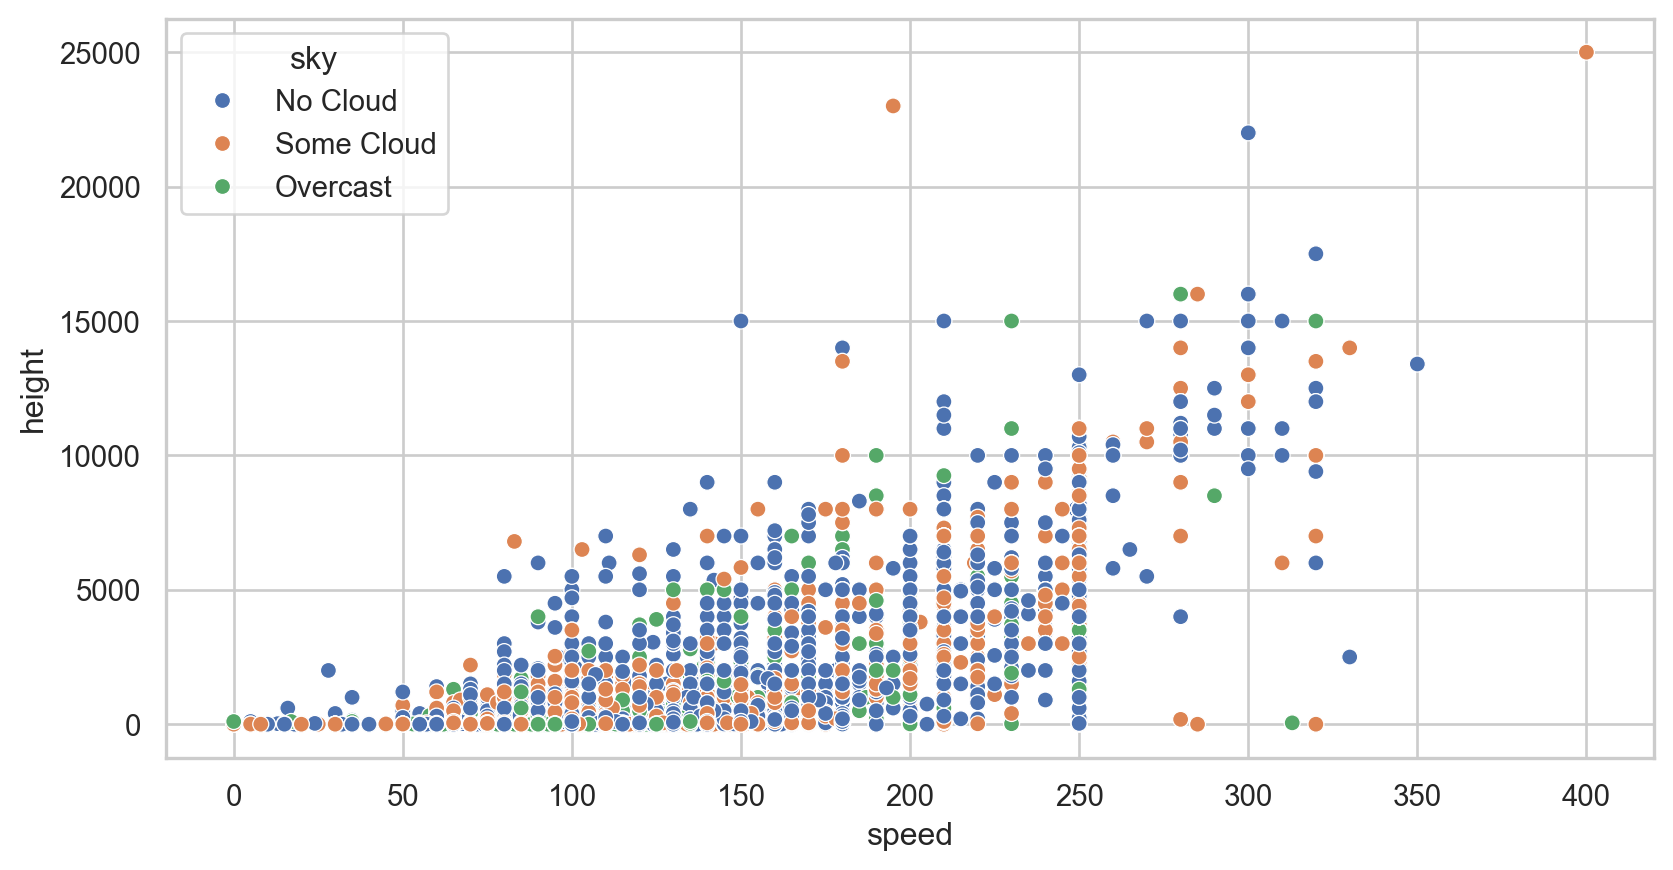

In [36]:
#| code-fold: true
#| code-line-numbers: 1-6|4

sns.set_theme(style = "whitegrid")

sns.scatterplot(data = birds, x = "speed", y = "height",
                hue = "sky")

plt.show()

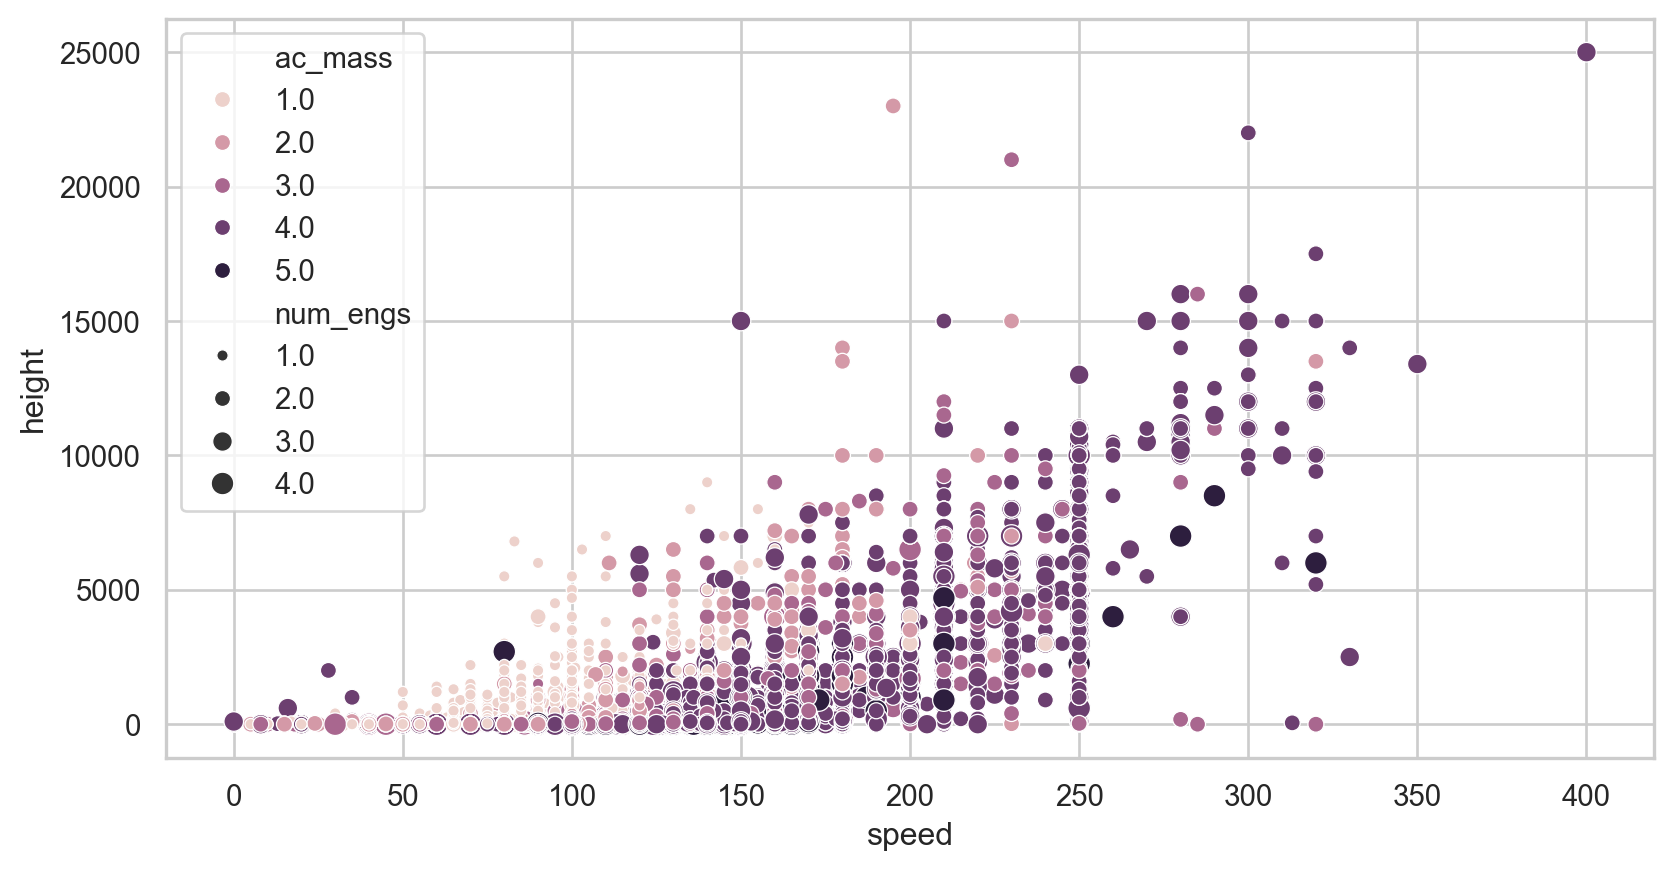

In [37]:
#| code-fold: true
#| code-line-numbers: 1-6|4

sns.set_theme(style = "whitegrid")

sns.scatterplot(data = birds, x = "speed", y = "height",
                size = "num_engs", hue = "ac_mass")

plt.show()

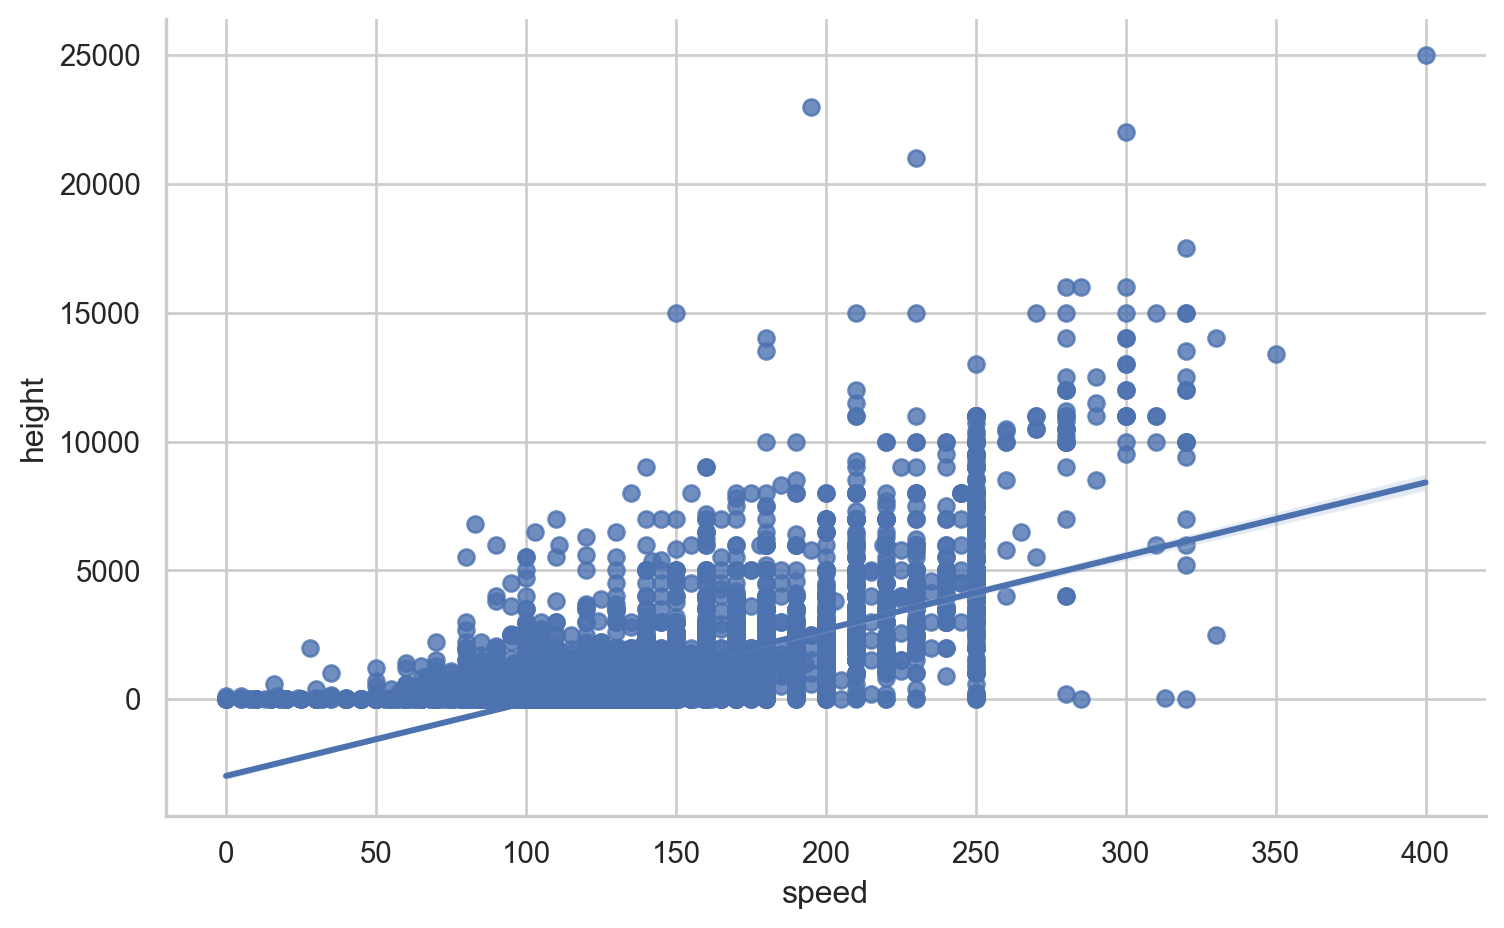

In [38]:
#| code-fold: true
#| code-line-numbers: 1-4|1
sns.lmplot(data = birds, x = "speed", y = "height",
           aspect = 8/5)

plt.show()

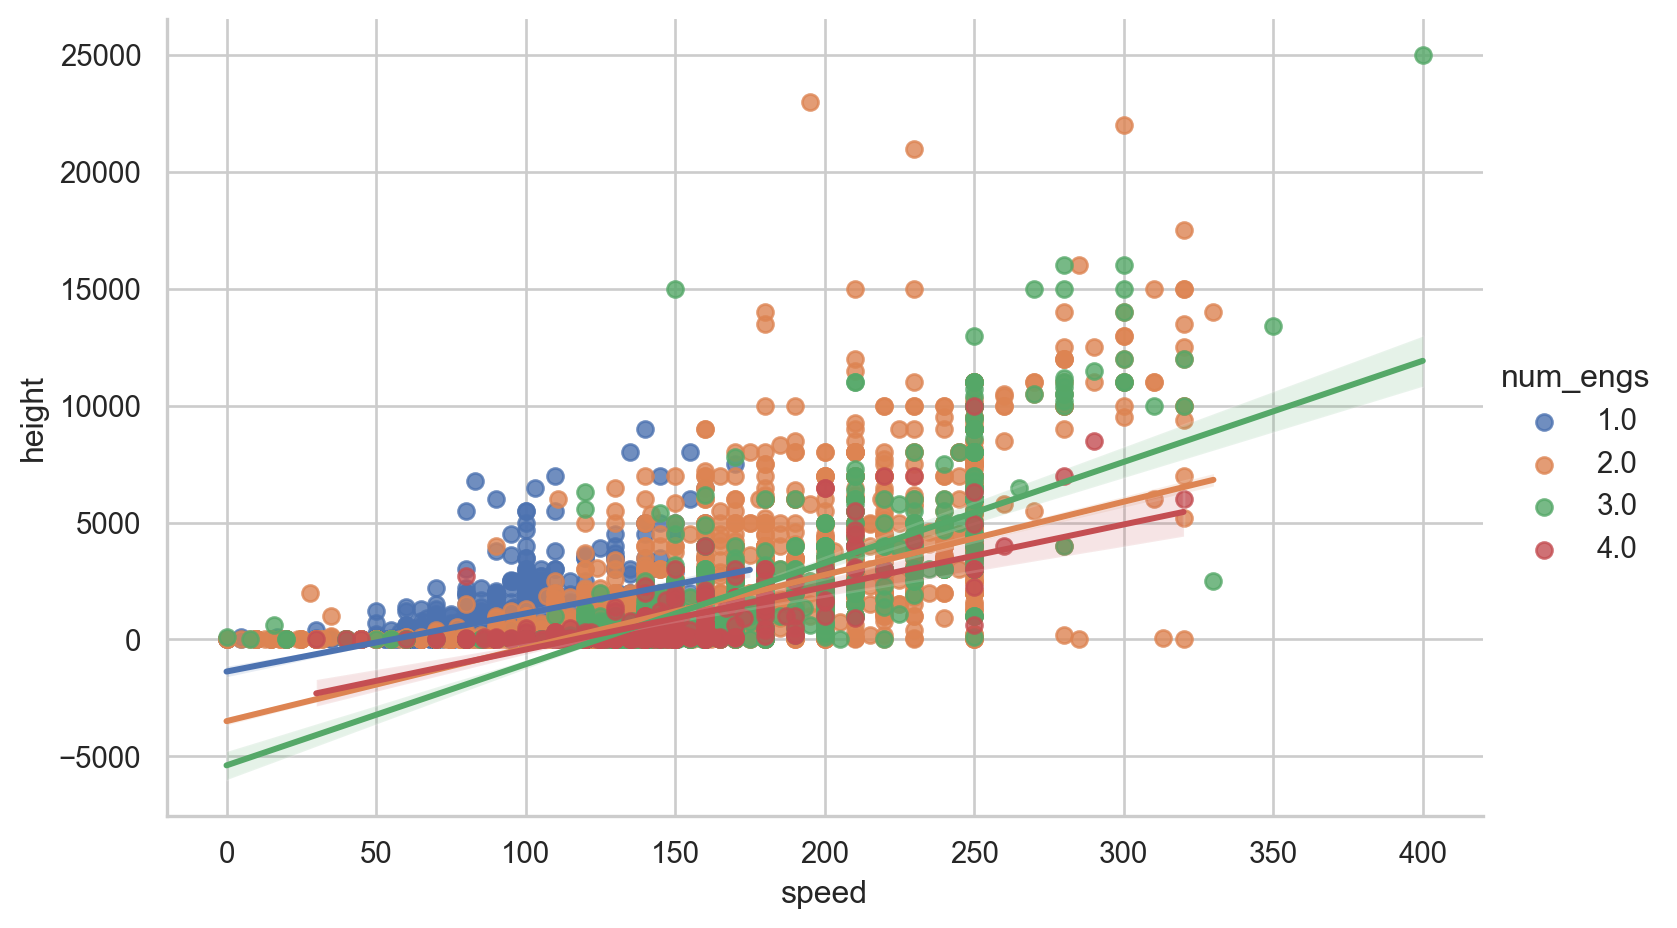

In [39]:
#| code-fold: true
#| code-line-numbers: 1-4|1
sns.lmplot(data = birds, x = "speed", y = "height",
           hue = "num_engs", aspect = 8/5)

plt.show()

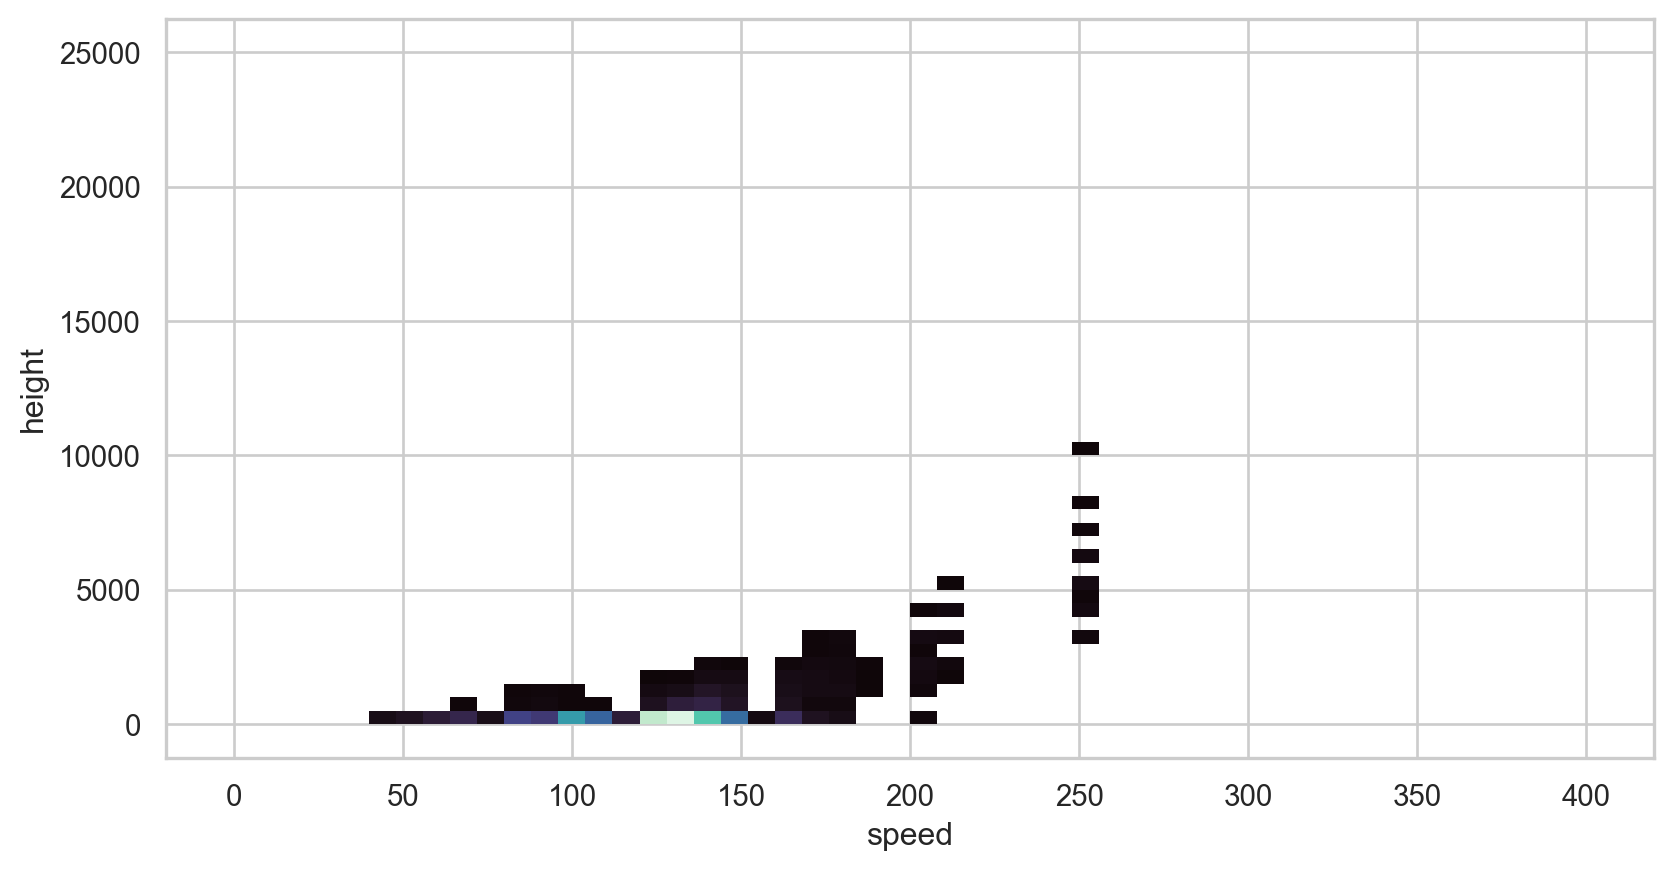

In [40]:
#| code-fold: true
#| code-line-numbers: 1-4|2
sns.histplot(data = birds, x = "speed", y = "height", 
             bins = 50, pthresh = 0.1, cmap = "mako")

plt.show()

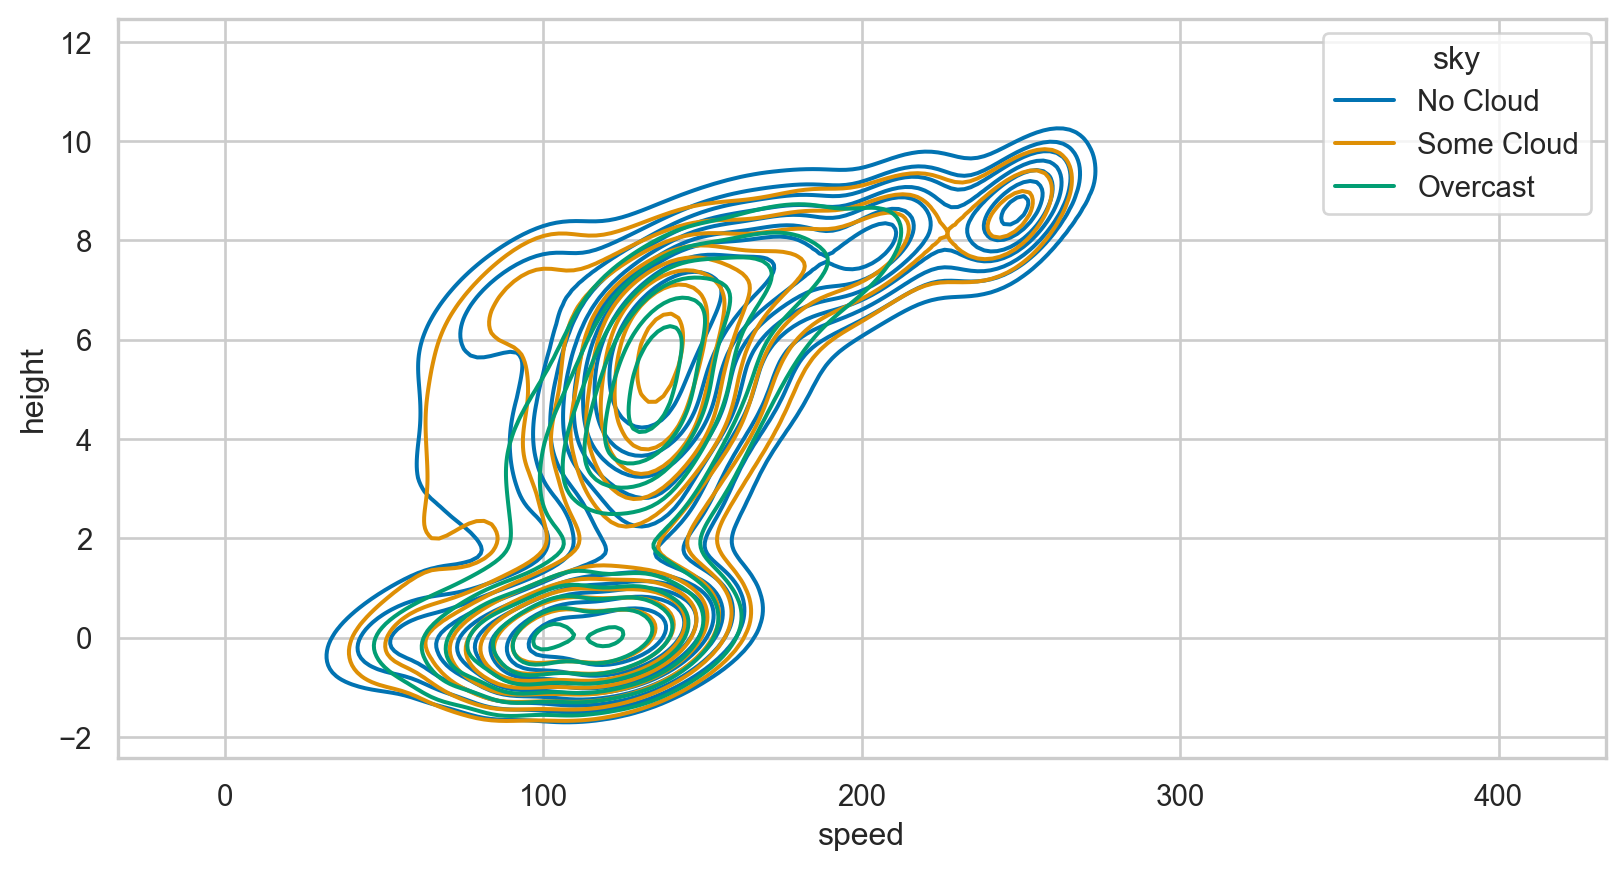

In [41]:
#| code-fold: true
#| code-line-numbers: 1-4|1,2
sns.kdeplot(data = birds, x = "speed", y = np.log(birds['height'] + 1), 
             thresh = 0.1, hue = "sky", palette = "colorblind")

plt.show()

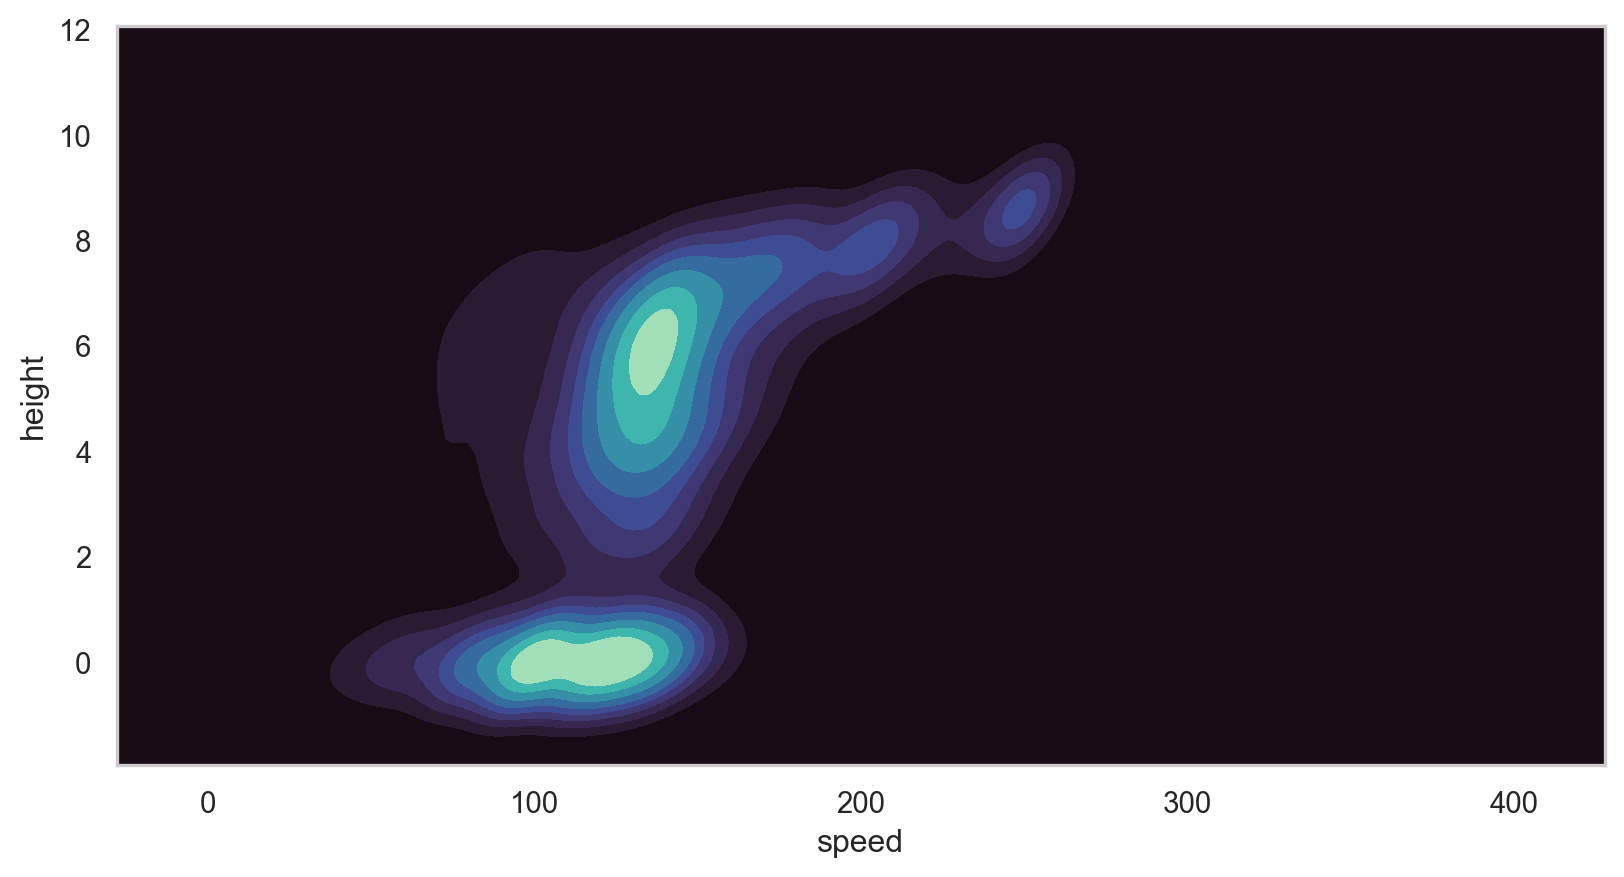

In [42]:
#| code-fold: true
#| code-line-numbers: 1-4|1,2
sns.kdeplot(data = birds, x = "speed", y = np.log(birds['height'] + 1), 
             thresh = 0, cmap = "mako", fill = True, levels = 10)

plt.show()

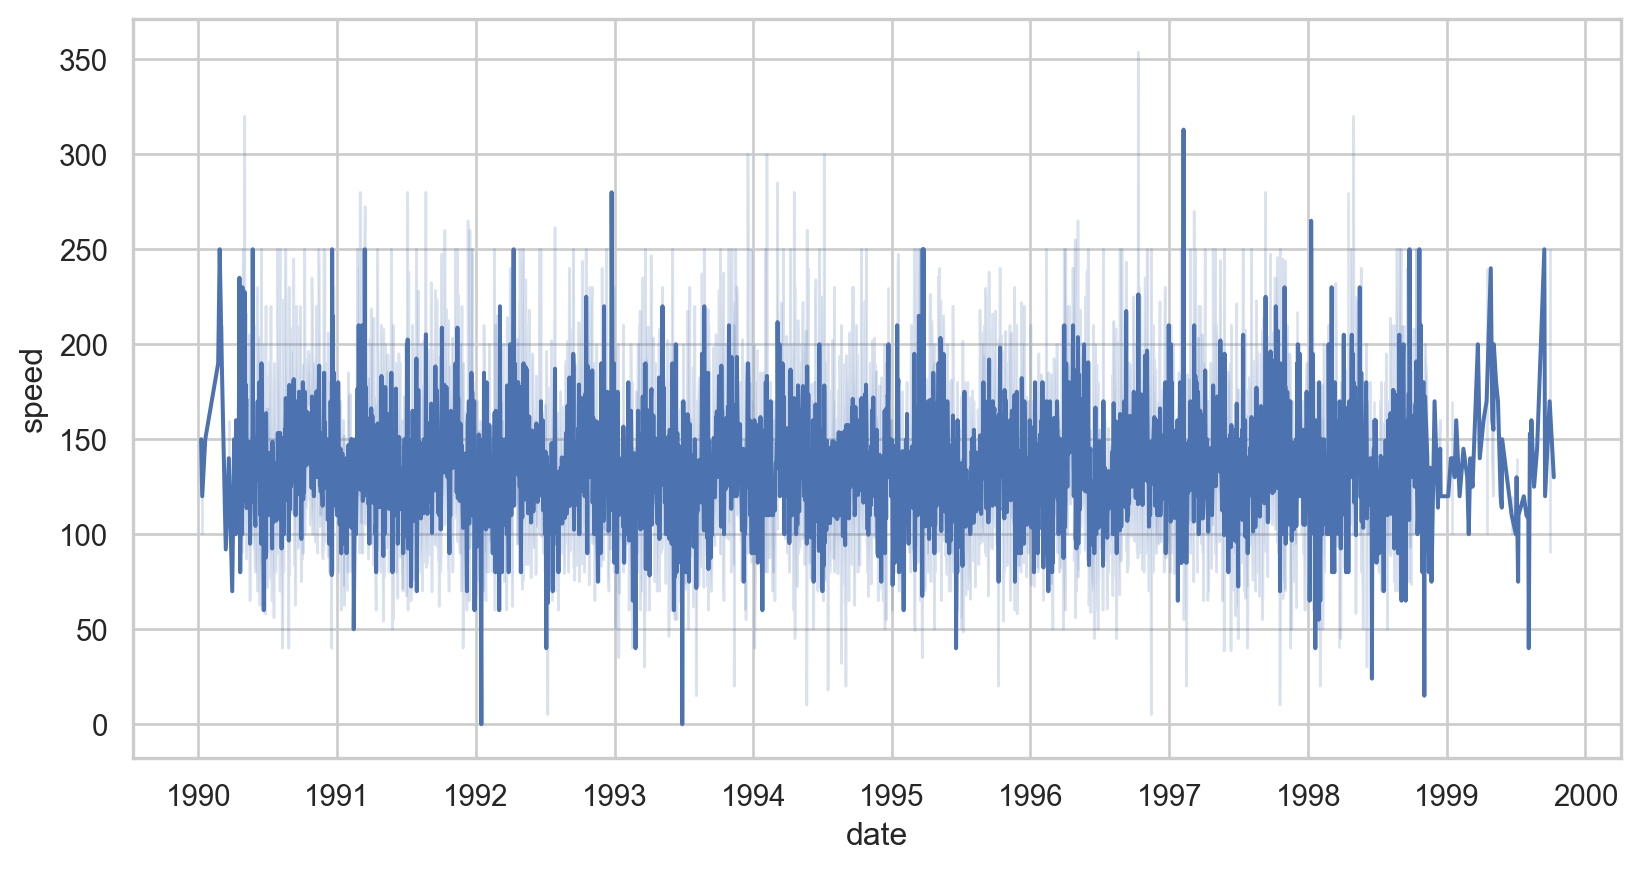

In [43]:
#| code-fold: true
#| code-line-numbers: 1-6|3
sns.set_theme(style = "whitegrid")

sns.lineplot(data = birds, x = "date", y = "speed")

plt.show()

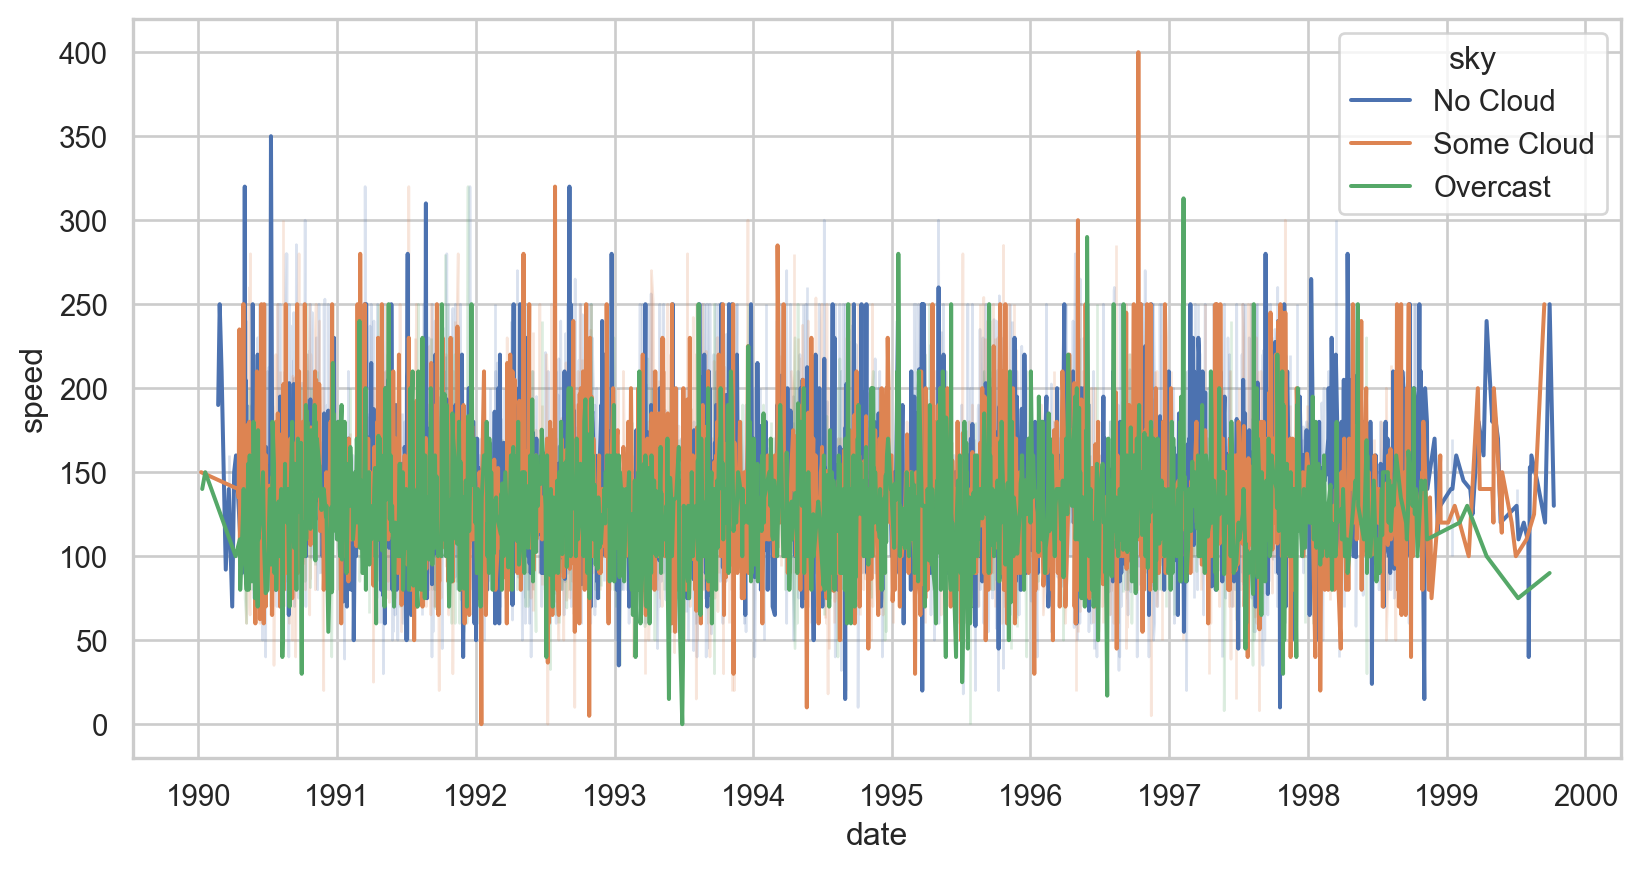

In [44]:
#| code-fold: true
#| code-line-numbers: 1-4|2
sns.lineplot(data = birds, x = "date", y = "speed",
             hue = "sky")

plt.show()

/var/folders/r0/k4l4y5td4vv9z4hb8qx7k45m0000gp/T/ipykernel_44738/2447519788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = birds, x = "sky",


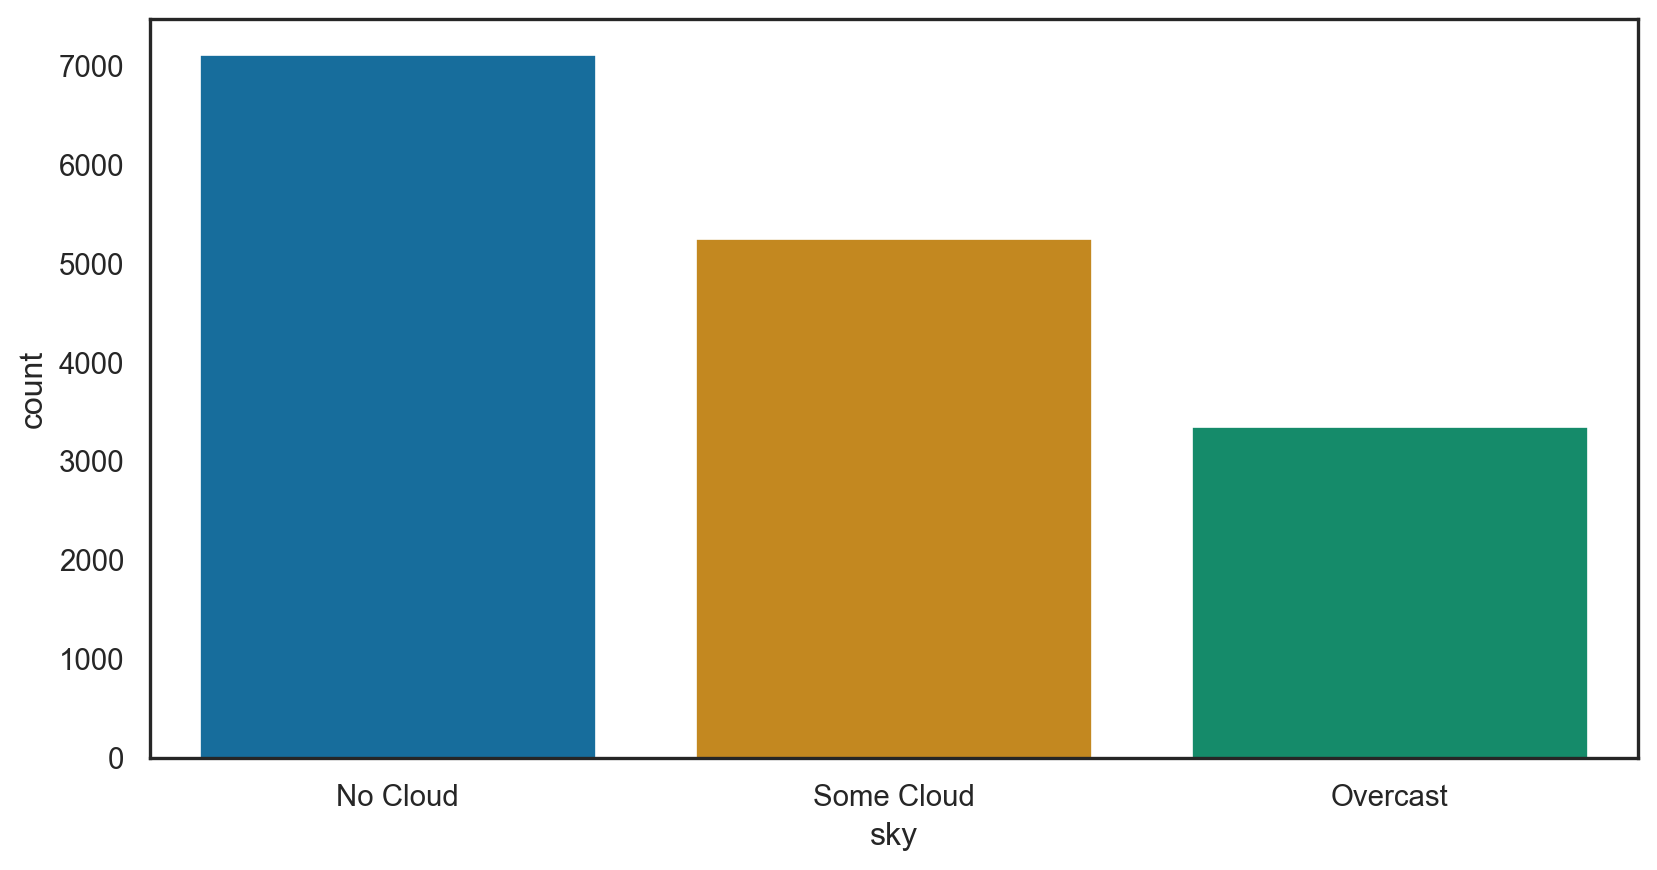

In [45]:
#| code-fold: true
#| code-line-numbers: 1-6|3

sns.set_theme(style = "white")

sns.countplot(data = birds, x = "sky", 
              palette = "colorblind")
              
plt.show()

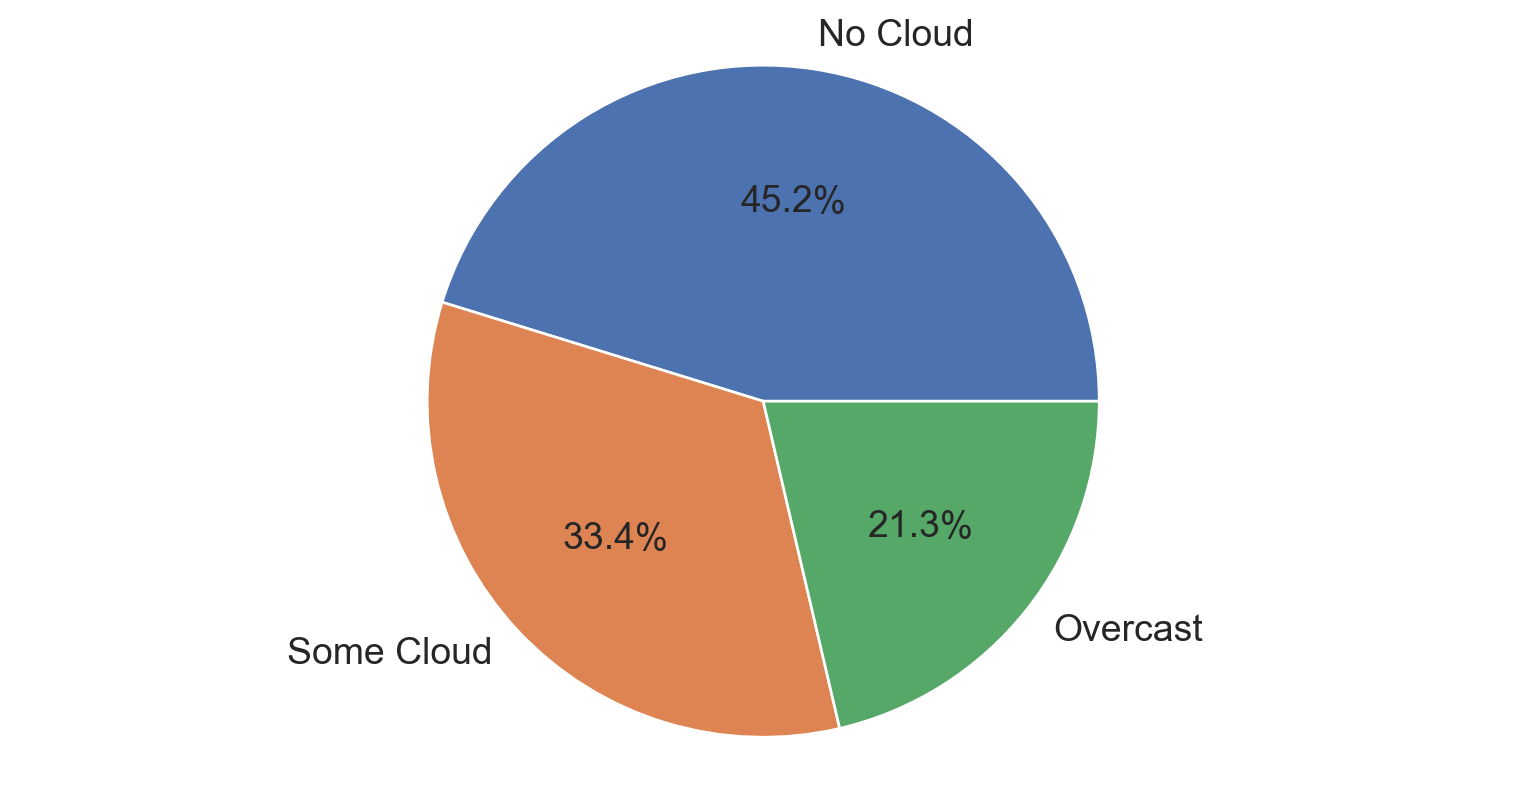

In [46]:
#| code-fold: true
#| code-line-numbers: 1-9|1|3-5|7
category_counts = birds['sky'].value_counts()

plt.pie(category_counts, labels = category_counts.index, 
        autopct = lambda p: f'{p:.1f}%', 
        textprops = {'size':14})

plt.axis('equal')

plt.show()

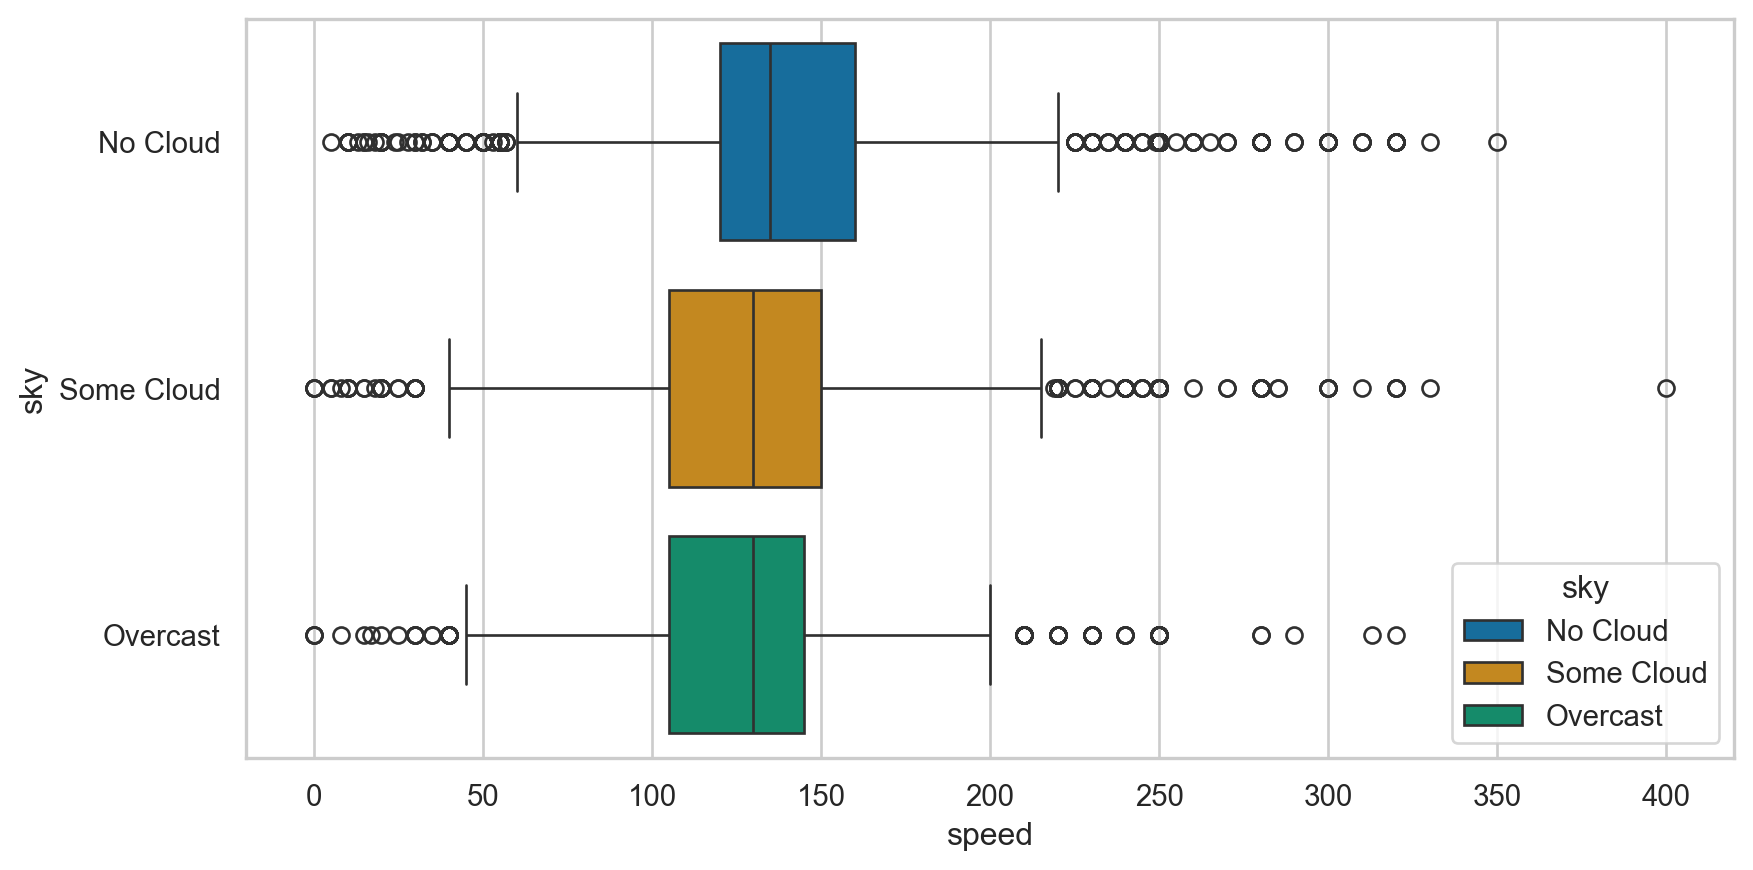

In [47]:
#| code-fold: true
#| code-line-numbers: 1-6|1|3,4
sns.set_style("whitegrid")

sns.boxplot(data = birds, x = "speed", y = "sky",
            hue = "sky", palette = "colorblind")

plt.show()

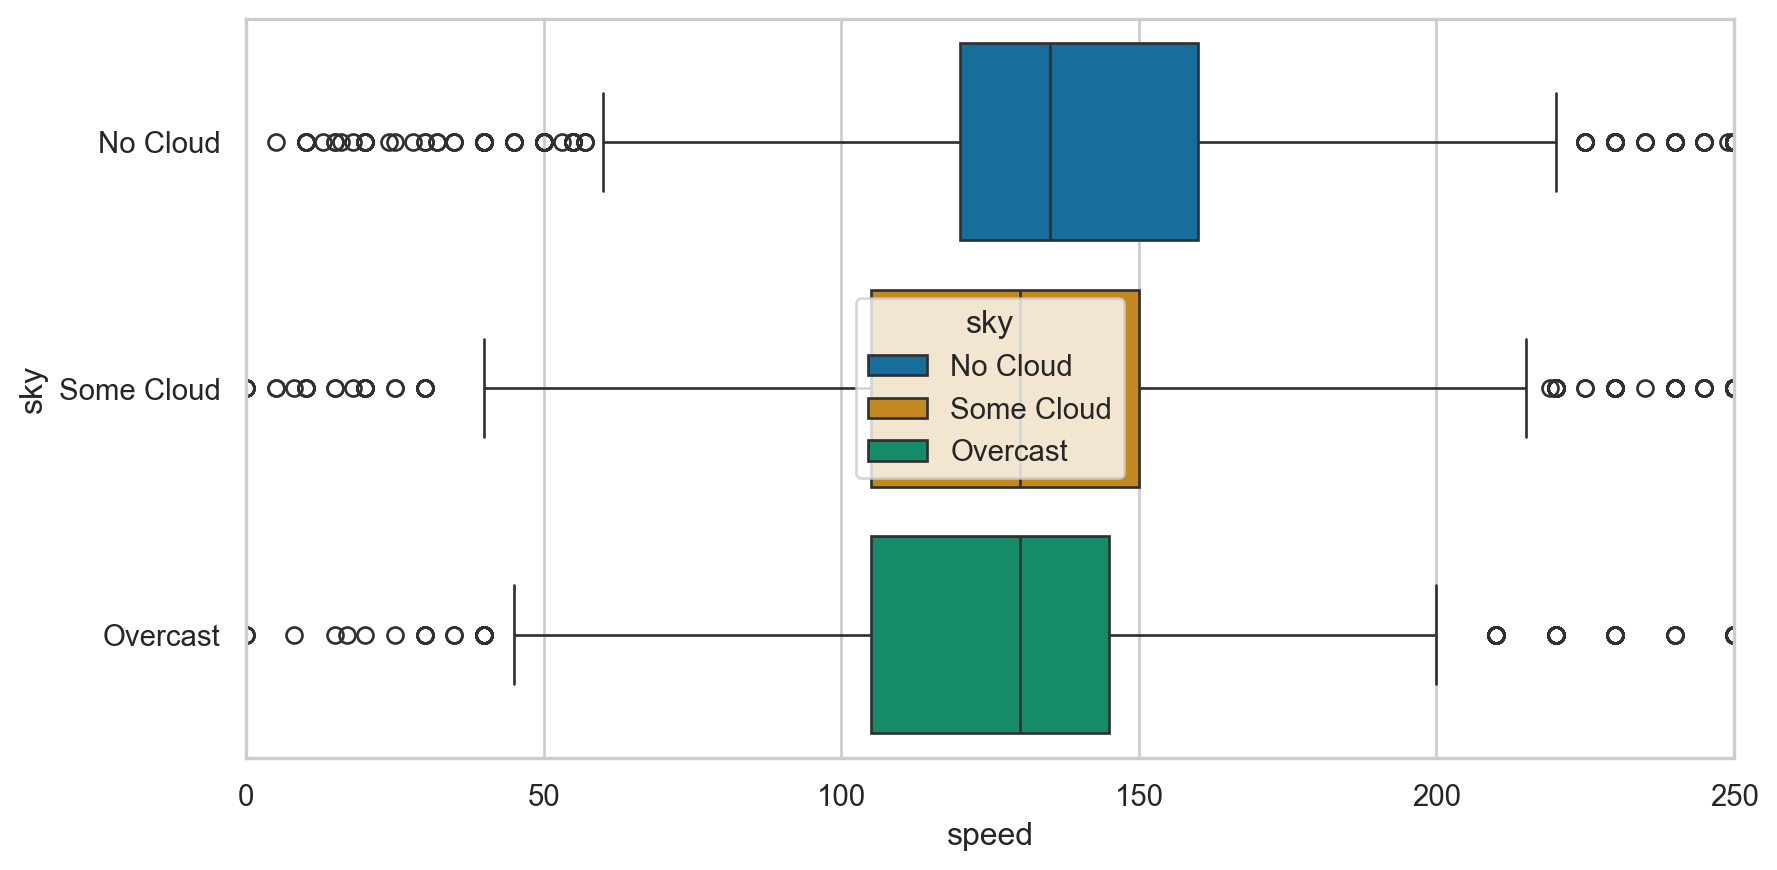

In [48]:
#| code-fold: true
#| code-line-numbers: 1-8|6

sns.set_style("whitegrid")

p1 = sns.boxplot(data = birds, x = "speed", y = "sky",
                 hue = "sky", palette = "colorblind")

p1.set_xlim(0, 250)

plt.show()

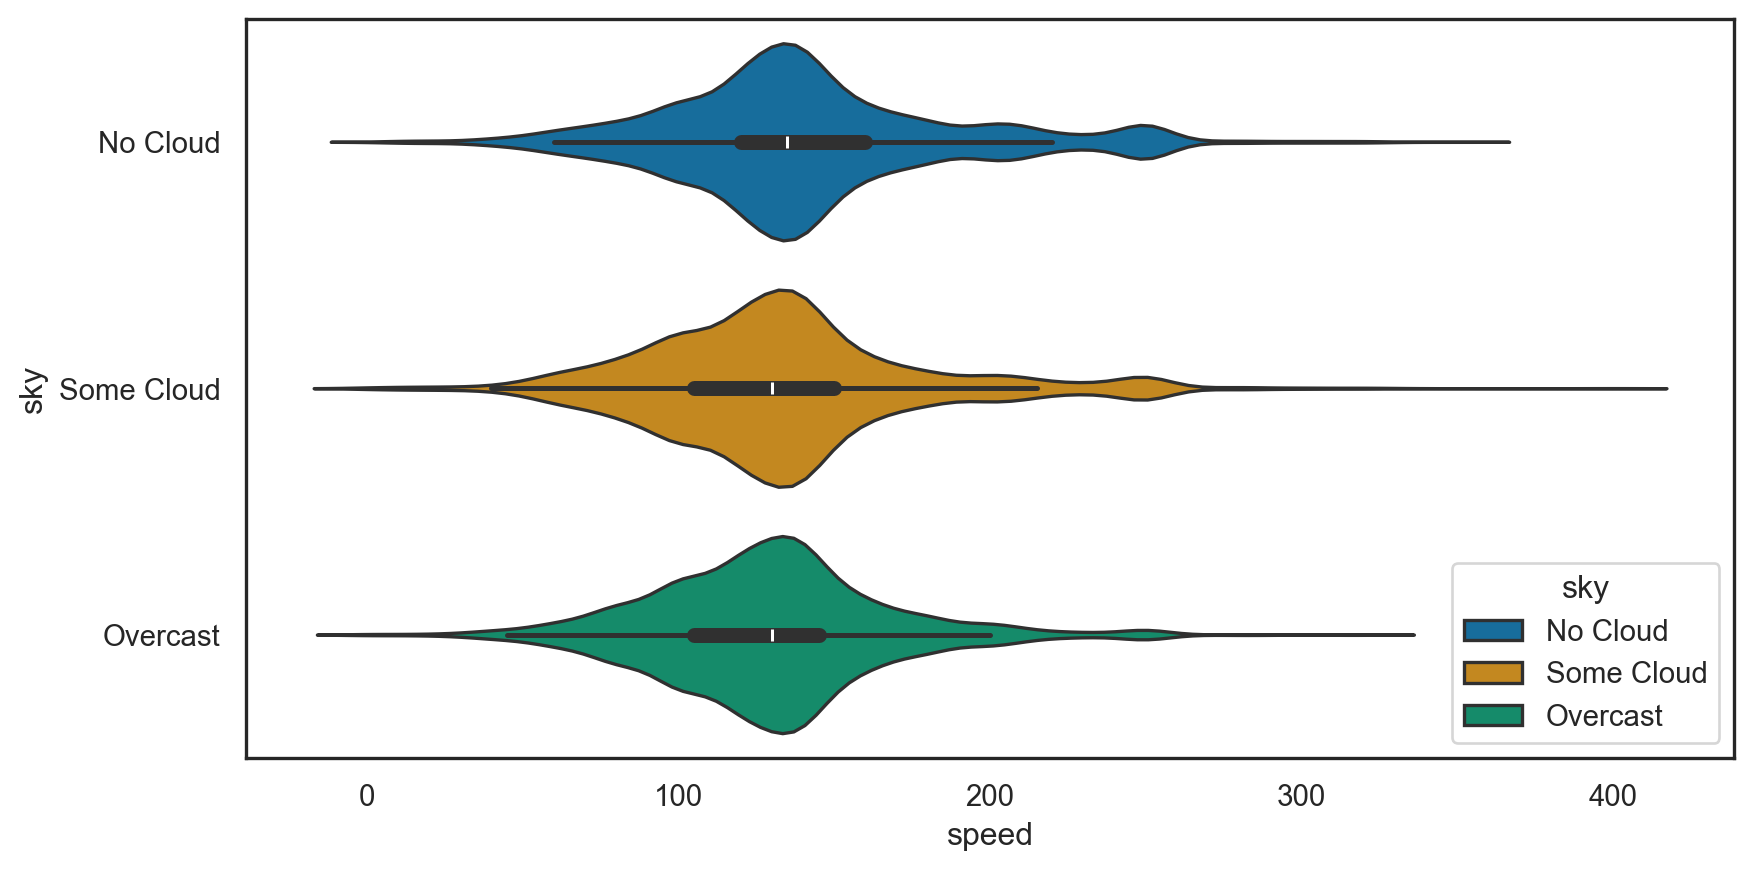

In [49]:
#| code-fold: true
#| code-line-numbers: 1-6|3,4

sns.set_style("white")

sns.violinplot(data = birds, x = "speed", y = "sky", hue = "sky",
                    palette = "colorblind")
               
plt.show()

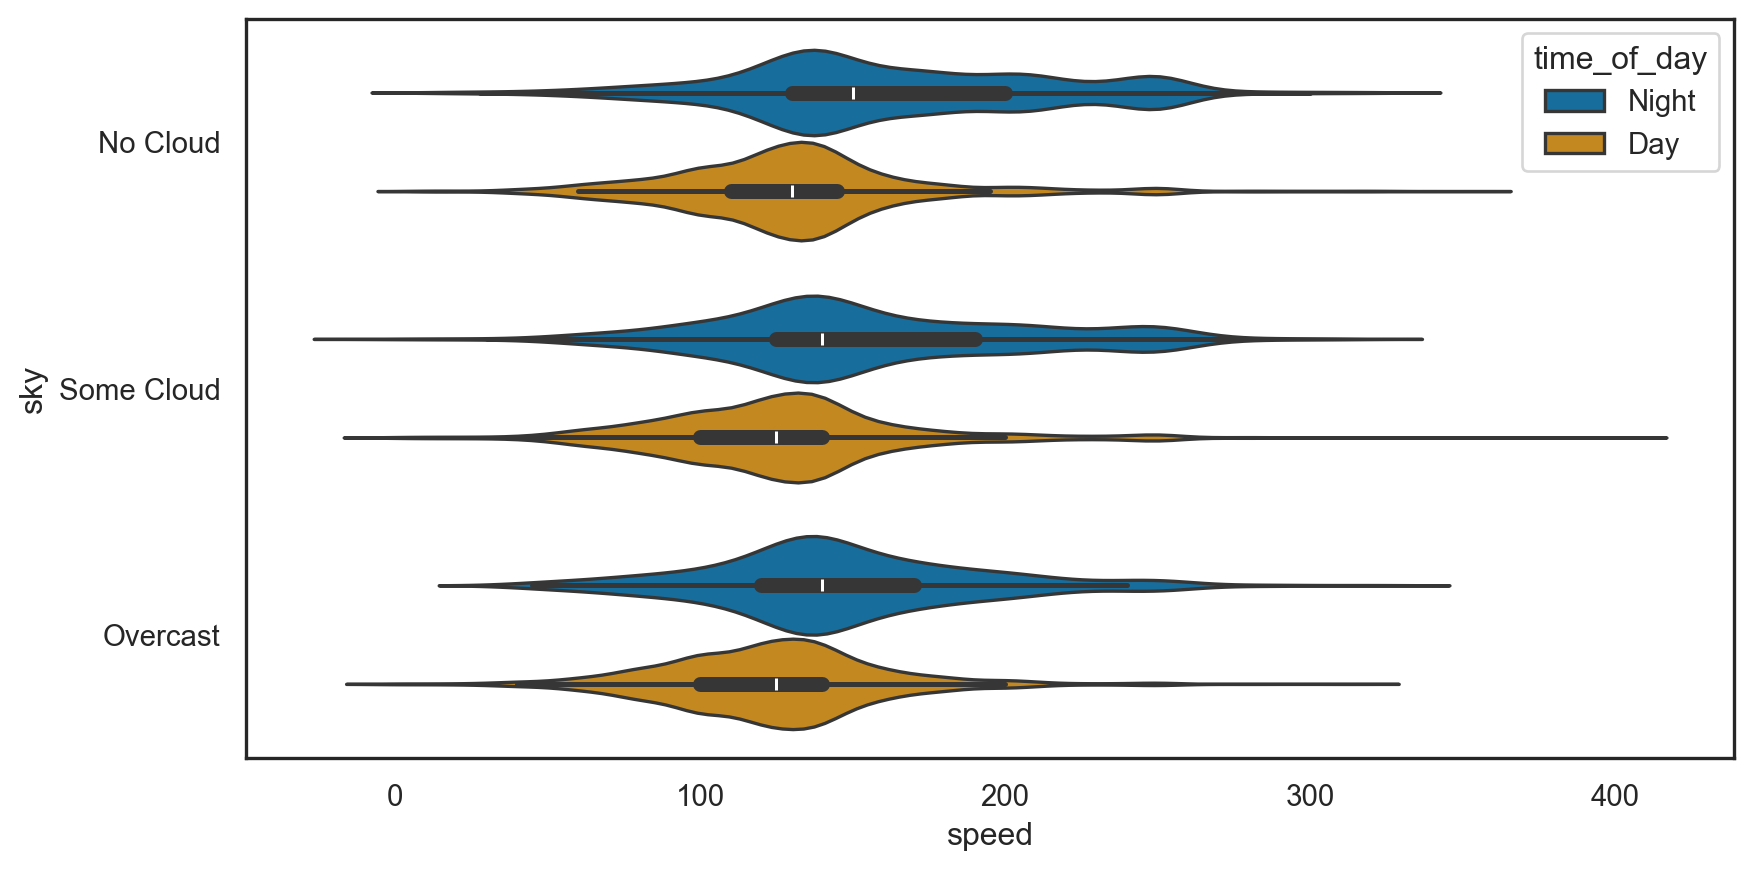

In [50]:
#| code-fold: true
#| code-line-numbers: 1-10|3,5|7
sns.set_style("white")

options = ['Night', 'Day']

birds_filt = birds[birds['time_of_day'].isin(options)]

sns.violinplot(data = birds_filt, x = "speed", y = "sky", hue = "time_of_day",
                    palette = "colorblind")
               
plt.show()

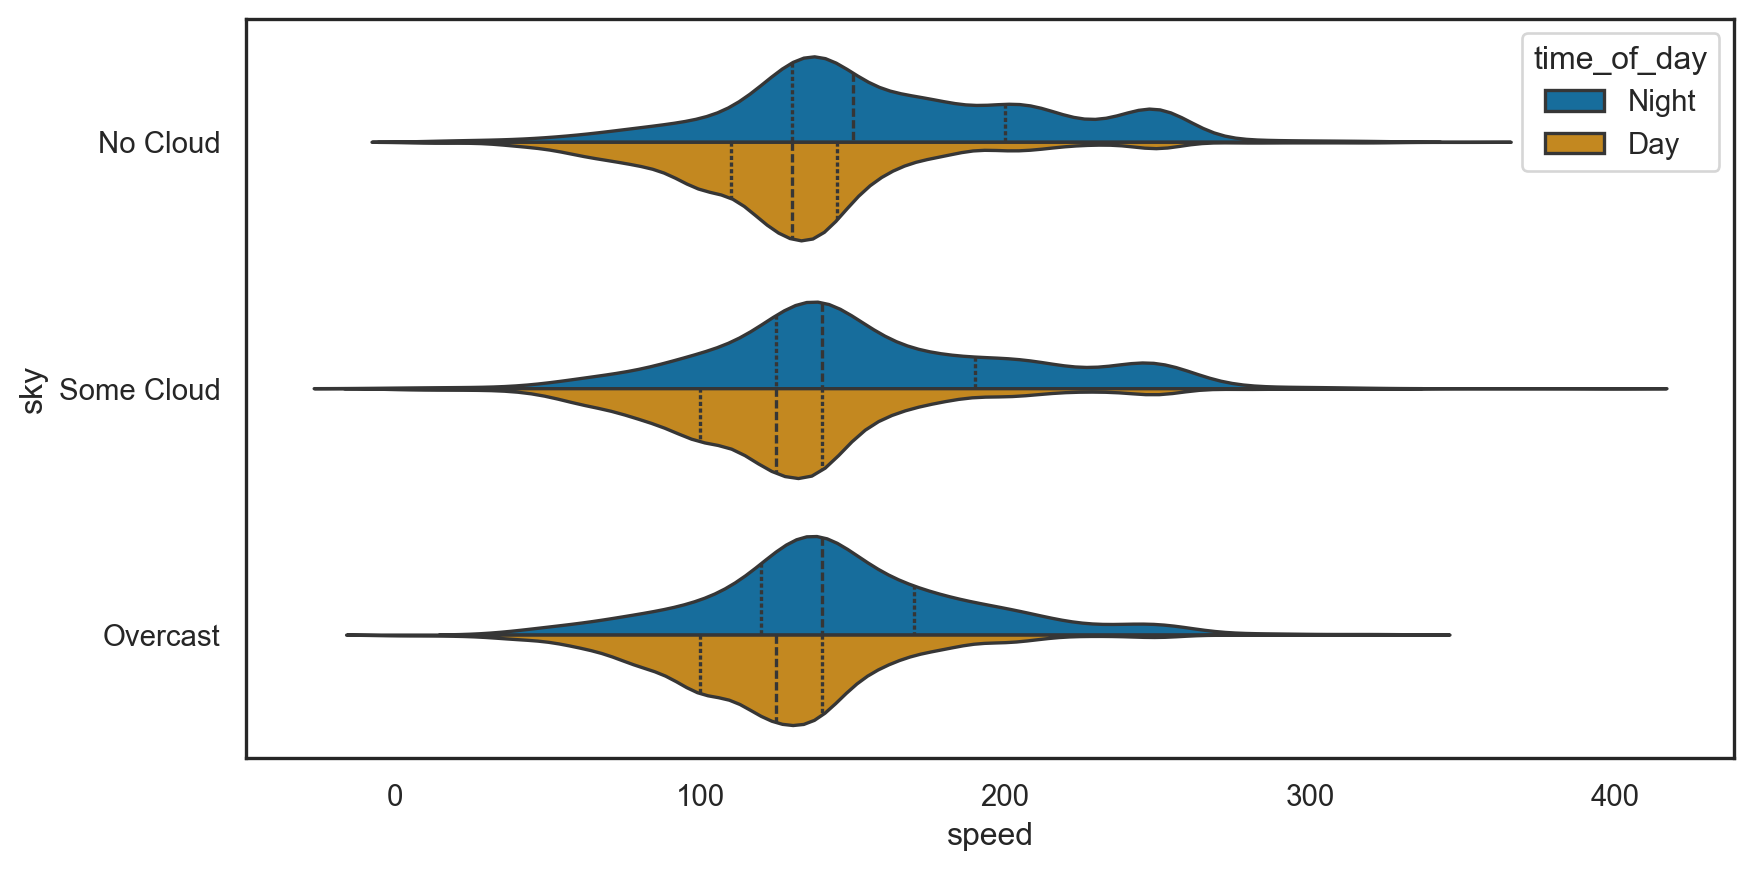

In [51]:
#| code-fold: true
#| code-line-numbers: 1-7|5
sns.set_style("white")

sns.violinplot(data = birds_filt, x = "speed", y = "sky", hue = "time_of_day",
                    palette = "colorblind",
                    inner = "quart", split = True)
               
plt.show()

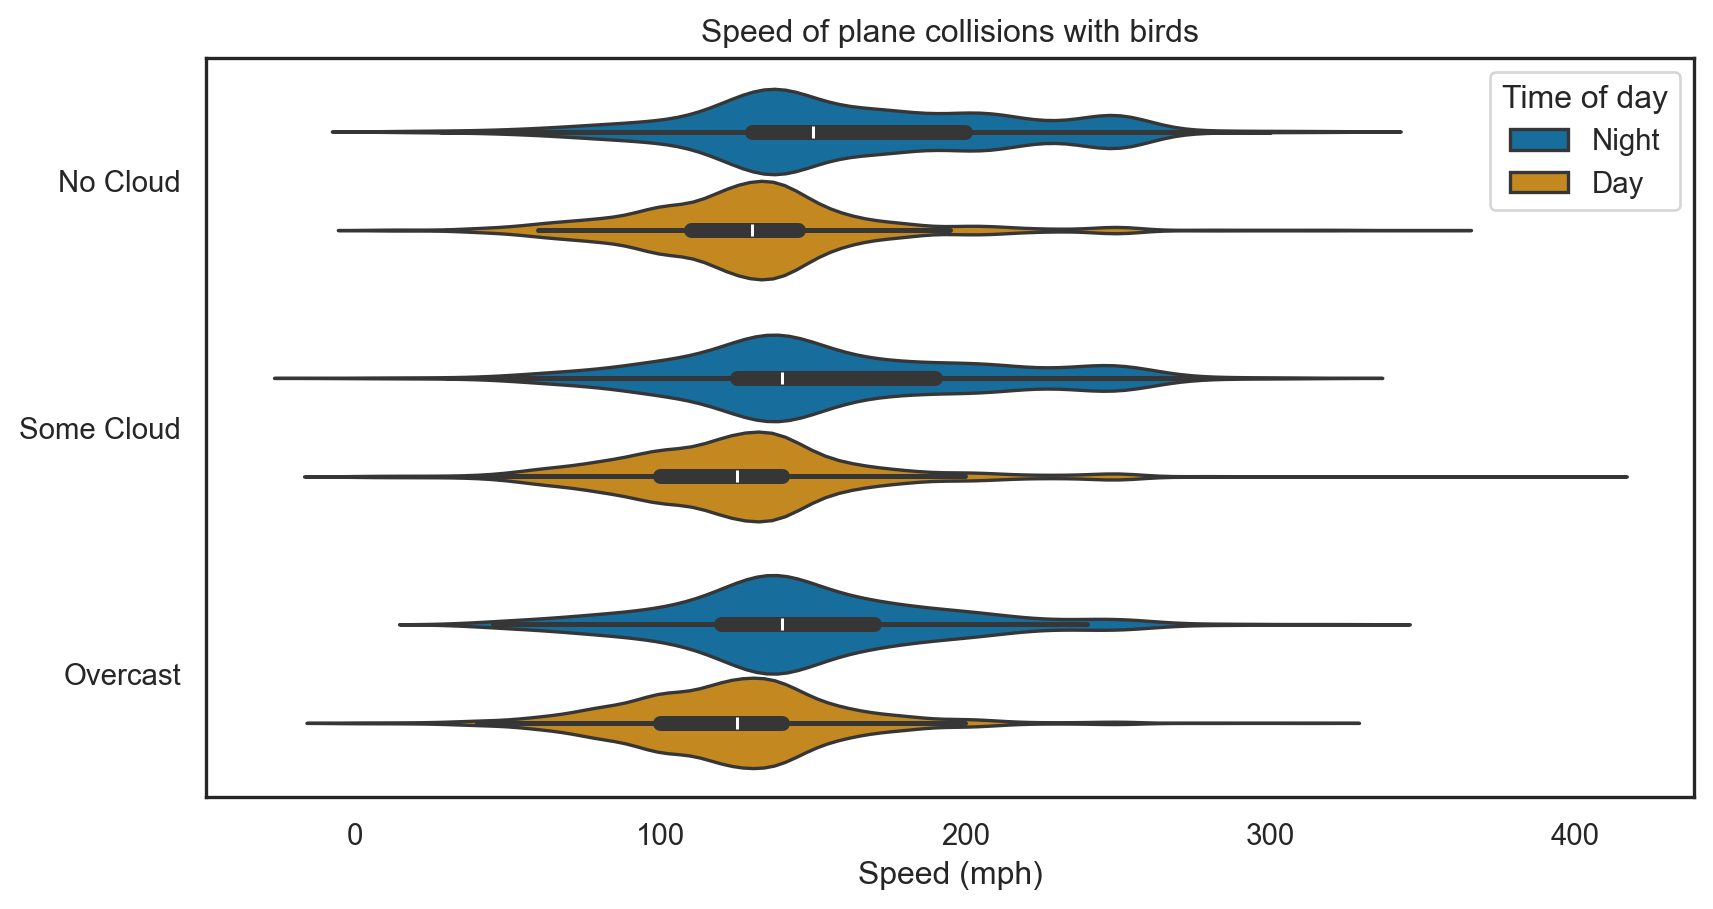

In [52]:
#| code-fold: true
#| code-line-numbers: 1-11|6-9
sns.set_style("white")

g1 = sns.violinplot(data = birds_filt, x = "speed", y = "sky", hue = "time_of_day",
                    palette = "colorblind")

g1.set(xlabel = "Speed (mph)")
g1.set(ylabel = None)
g1.set(title = "Speed of plane collisions with birds")
g1.legend(title = "Time of day")

plt.show()

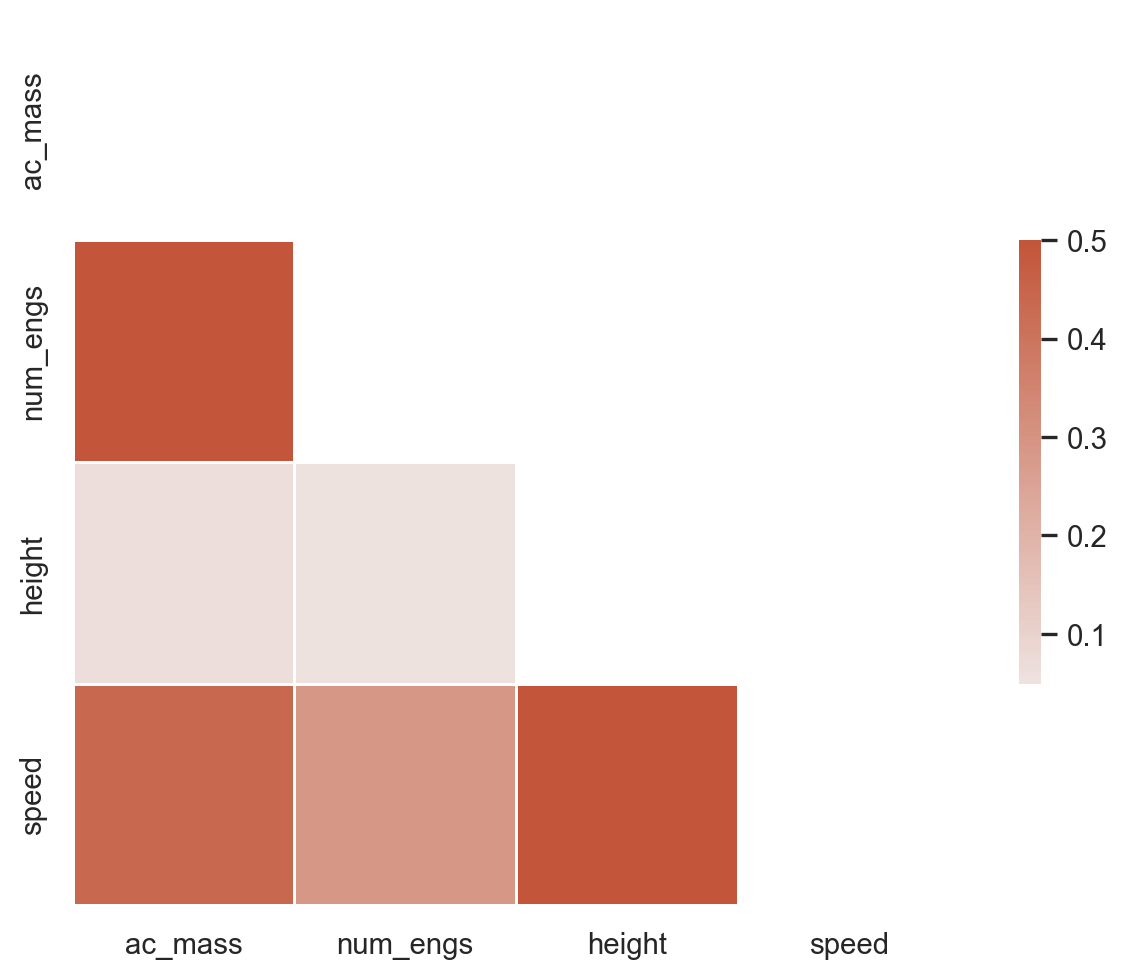

In [53]:
#| code-fold: true
#| code-line-numbers: 1-16|3|5|7|9,11|13,14
sns.set_theme(style = "white")

birds_num = birds.select_dtypes(include = 'number')

corr = birds_num.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

f, ax = plt.subplots(figsize = (8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.5, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": 0.5})
            
plt.show()

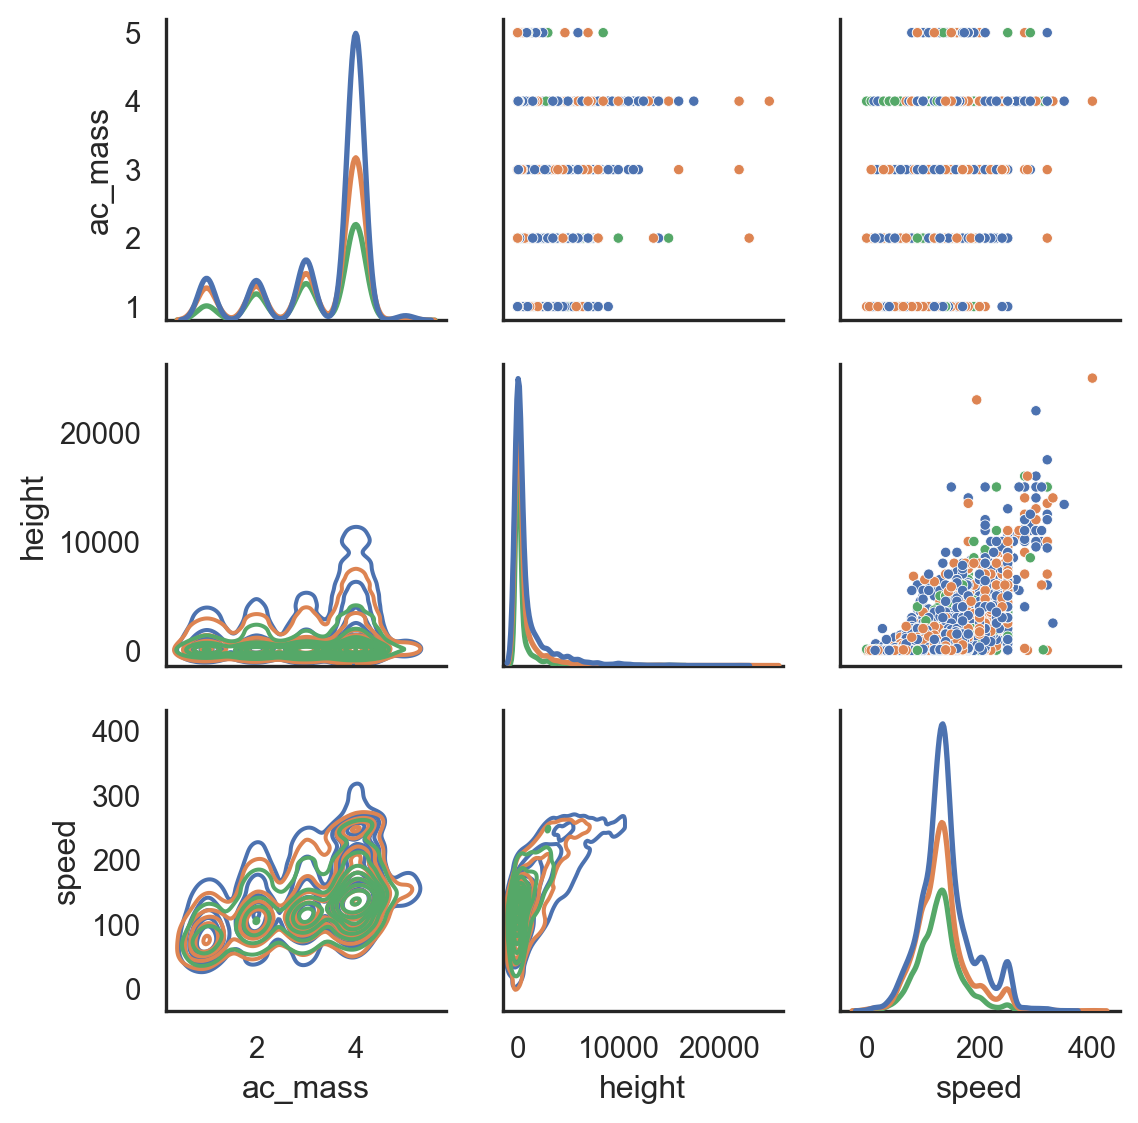

In [54]:
#| code-fold: true
#| code-line-numbers: 1-11|3|5-9|
sns.set_theme(style = "white")

birds_sub = birds[['ac_mass', 'height', 'speed', 'sky']]

g = sns.PairGrid(birds_sub, diag_sharey = False, 
                 height = 2, hue = "sky")
g.map_upper(sns.scatterplot, s = 15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw = 2)

plt.show()

In [55]:
diwali = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-14/diwali_sales_data.csv', encoding = 'iso-8859-1')
diwali.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0

In [56]:
#| code-fold: true
#| eval: false
# Examine data
diwali.info()

# Data types
diwali.dtypes

# Describe numerical columns
diwali.describe()

# Describe categories
diwali.describe(exclude = [np.number])

# Unique levels
categorical_cols = diwali.select_dtypes(include = ['object', 'category']).columns
unique_levels = diwali[col].unique()

# Outliers
# Make a copy of the diwali data 
dataCopy = diwali.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Define the 25th and 75th percentiles
  q25, q75 = round((dataRed_i.quantile(q = 0.25)), 3), round((dataRed_i.quantile(q = 0.75)), 3)
  
  # Define the interquartile range from the 25th and 75th percentiles defined above
  IQR = round((q75 - q25), 3)
  
  # Calculate the outlier cutoff 
  cut_off = IQR * 1.5
  
  # Define lower and upper cut-offs
  lower, upper = round((q25 - cut_off), 3), round((q75 + cut_off), 3)
  
  # Print the values
  print(' ')
  
  # For each value of i_col, print the 25th and 75th percentiles and IQR
  print(i_col, 'q25 =', q25, 'q75 =', q75, 'IQR =', IQR)
  
  # Print the lower and upper cut-offs
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits, print that value
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())

# Missing values
diwali.isnull().sum()

# Normality - qq plot
# Change theme to "white"
sns.set_style("white")

# Make a copy of the data 
dataCopy = diwali.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Specify desired column
i_col = dataCopyFin.Amount

# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Amount spent (₹)')

# Q-Q plot
sm.qqplot(i_col, line = 's', ax = ax2)
ax2.set_title('Amount spent Q-Q plot')
plt.tight_layout()
plt.show()